In [ ]:
1. Introduction 

A brief description of your dataset: This data set seeks to find correlation between 																					 

This database presents measurements from specific production lines operating in an electrical cable manufacturing plant. The data were captured over four consecutive weeks, across all three daily shifts. The collected measurements include data on the human element (operator of the machine or machines on the line), environmental conditions, training, safety variables, and reports of unsafe conditions noted by the line supervisor during the shift. This database was compiled to understand the occurrence of workplace accidents and the underlying processes that provoke them. Include these variables  

In [ ]:
context/domain/industry- Electrical Manufacturing Plant

In [147]:
# Checking lengths of each list in the data dictionary
data = {
    'Variable Name': [
        'ID_LINE', 'AGE_OPERATOR', 'YEARS_EXP', 'SENIORITY', 'EMPLOYEE_CAT', 'HOURS_OFTRAINING_SECURITY',
        'HOURS_OFTRAINING_POSITION', 'GRADE_TEOREXAM', 'GRADE_PRACTICALEXAM', 'NUMBER_ILLS', 'SCORE_RISKOFMACH', 
        'SCORE_ILLUM', 'NOISE_ATPLACE', 'NUMBER_EXTRAHOURS', 'NUMBER_RESTHOURS', 'SCORE_HIDRAT', 'USE_PPE', 
        'USE_ADEQTOOLS', 'SUFFER_ANXIETY', 'EXPOSED_QUIM', 'SCORE_ILLUM', 'AVAILABLE_SPACE', 'SCORE_FATIGUE', 
        'EVAL_TIMEAVAIL', 'EVAL_KNOWSUFFIC', 'TEMP_PLACEOFWORK', 'ACA'
    ],
    'Measurement Type': [
        'Nominal', 'Ratio', 'Ratio', 'Ratio', 'Ordinal', 'Ratio', 'Ratio', 'Scale', 'Scale', 'Ratio', 'Scale', 'Scale', 
        'Scale', 'Ratio', 'Ratio', 'Ratio', 'Scale', 'Binary', 'Binary', 'Binary', 'Scale', 'Scale', 'Scale', 'Scale', 'Scale', 
        'Ratio', 'Nominal'
    ],
    'Role': [
        'Excluded', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 
        'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 
        'Outcome', 'Outcome', 'Outcome', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor','Predictor', 'Predictor', 
        'Outcome'
    ],
    'Industry': [
        'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
        'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
        'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
        'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 'Manufacturing', 
        'Manufacturing', 'Manufacturing', 'Manufacturing'
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)


                Variable Name Measurement Type       Role       Industry
0                     ID_LINE          Nominal   Excluded  Manufacturing
1                AGE_OPERATOR            Ratio  Predictor  Manufacturing
2                   YEARS_EXP            Ratio  Predictor  Manufacturing
3                   SENIORITY            Ratio  Predictor  Manufacturing
4                EMPLOYEE_CAT          Ordinal  Predictor  Manufacturing
5   HOURS_OFTRAINING_SECURITY            Ratio  Predictor  Manufacturing
6   HOURS_OFTRAINING_POSITION            Ratio  Predictor  Manufacturing
7              GRADE_TEOREXAM            Scale  Predictor  Manufacturing
8         GRADE_PRACTICALEXAM            Scale  Predictor  Manufacturing
9                 NUMBER_ILLS            Ratio  Predictor  Manufacturing
10           SCORE_RISKOFMACH            Scale  Predictor  Manufacturing
11                SCORE_ILLUM            Scale  Predictor  Manufacturing
12              NOISE_ATPLACE            Scale  Pre

In [1]:
!pip install pandas openpyxl

In [2]:
!pip install seaborn

In [3]:
! pip install ISLP

In [4]:
!pip install scipy

In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

# Helps on better visalization of graphs
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# These code will bring statmodels library and dependences
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [4]:
import pandas as pd

# Path to the file in the Downloads folder (adjust the username as needed)
file_path = 'C:/Users/wsher/Downloads/PLANT_SECURITY_SV.xlsx'

# Read the data from the specified sheet
database = pd.read_excel(file_path, sheet_name='DB')

In [5]:
database.head()

ID_LINE  AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
0       189399M851            36          6          6             6   
1      2133265M301            19          1          1             6   
2       32695VZF81            39         10         21             6   
3      4147823VZ81            22          1          1             7   
4  5106984MZV7/1 1            26          1          4             6   

   HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0                       14.5                         38             100   
1                       14.5                         22              95   
2                       14.5                         38             100   
3                       14.5                         10              90   
4                       14.5                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  ...  USE_ADEQTOOLS  SUFFER?ANXIETY  \
0                  100            3  ...              1               1   
1                   95            1  ...              1               0   
2                  100            2  ...              1               0   
3                   90            2  ...              1               0   
4                  100            1  ...              1               0   

   EXPOSED_QUIM  SCORE_ILLUM.1  AVAILABLE_SPACE  SCORE_FATIGUE  \
0             1              4                4              3   
1             1              4                4              2   
2             4              4                3              4   
3             3              5                5              5   
4             2              4                4              2   

   EVAL_TIMEAVAIL  EVAL_KNOWSUFFIC  TEMP_PLACEOFWORK  ACA  
0               4                4              36.7    0  
1               4                4              36.3    0  
2               4                5              36.3    0  
3               5                5              36.3    4  
4               4                4              36.3    0  

[5 rows x 27 columns]

In [6]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_LINE                    865 non-null    object 
 1   AGE_OPERATOR               865 non-null    int64  
 2   YEARS_EXP                  865 non-null    int64  
 3   SENIORITY                  865 non-null    int64  
 4   EMPLOYEE_CAT               865 non-null    int64  
 5   HOURS_OFTRAINING_SECURITY  865 non-null    float64
 6   HOURS_OFTRAINING_POSITION  865 non-null    int64  
 7   GRADE_TEOREXAM             865 non-null    int64  
 8   GRADE_PRACTICALEXAM        865 non-null    int64  
 9   NUMBER_ILLS                865 non-null    int64  
 10  SCORE_RISKOFMACH           865 non-null    float64
 11  SCORE_ILLUM                865 non-null    float64
 12  NOISE_ATPLACE              865 non-null    float64
 13  NUMBER_EXTRAHOURS          865 non-null    float64

In [7]:
# checking shape of the data
print("There are", database.shape[0], 'rows and', database.shape[1], "columns.")

There are 865 rows and 27 columns.


In [8]:
# List of columns to include in the new DataFrame 'db'
columns_to_include = [
    'AGE_OPERATOR', 'YEARS_EXP', 'SENIORITY', 'EMPLOYEE_CAT',
    'HOURS_OFTRAINING_SECURITY', 'HOURS_OFTRAINING_POSITION', 
    'GRADE_TEOREXAM', 'GRADE_PRACTICALEXAM', 'NUMBER_ILLS', 
    'SCORE_RISKOFMACH', 'SCORE_ILLUM', 'NOISE_ATPLACE', 
    'NUMBER_EXTRAHOURS', 'NUMBER_RESTHOURS', 'SCORE_HIDRAT', 
    'USE_PPE', 'USE_ADEQTOOLS', 'SUFFER?ANXIETY', 'EXPOSED_QUIM', 
    'AVAILABLE_SPACE', 'SCORE_FATIGUE', 'EVAL_TIMEAVAIL', 
    'EVAL_KNOWSUFFIC', 'TEMP_PLACEOFWORK', 'ACA'
]

# Create the new DataFrame 'db' with only the selected columns
data = database[columns_to_include].copy()

In [9]:
data.head()

AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
0            36          6          6             6   
1            19          1          1             6   
2            39         10         21             6   
3            22          1          1             7   
4            26          1          4             6   

   HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0                       14.5                         38             100   
1                       14.5                         22              95   
2                       14.5                         38             100   
3                       14.5                         10              90   
4                       14.5                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  SCORE_RISKOFMACH  ...  USE_PPE  \
0                  100            3             789.0  ...        1   
1                   95            1             789.0  ...        1   
2                  100            2             868.0  ...        1   
3                   90            2             868.0  ...        1   
4                  100            1            1072.0  ...        1   

   USE_ADEQTOOLS  SUFFER?ANXIETY  EXPOSED_QUIM  AVAILABLE_SPACE  \
0              1               1             1                4   
1              1               0             1                4   
2              1               0             4                3   
3              1               0             3                5   
4              1               0             2                4   

   SCORE_FATIGUE  EVAL_TIMEAVAIL  EVAL_KNOWSUFFIC  TEMP_PLACEOFWORK  ACA  
0              3               4                4              36.7    0  
1              2               4                4              36.3    0  
2              4               4                5              36.3    0  
3              5               5                5              36.3    4  
4              2               4                4              36.3    0  

[5 rows x 25 columns]

In [10]:
data.tail()

AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
860            26          1          4             6   
861            28          1          1             2   
862            55         10         15             6   
863            24          1          1             4   
864            36          1          6             6   

     HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
860                       14.5                         38             100   
861                       14.5                         20             100   
862                       14.5                         38              90   
863                       14.5                         22             100   
864                       14.5                         38             100   

     GRADE_PRACTICALEXAM  NUMBER_ILLS  SCORE_RISKOFMACH  ...  USE_PPE  \
860                  100            1            1072.0  ...        1   
861                  100            0             623.8  ...        1   
862                   90            1             623.9  ...        1   
863                  100            1            1072.0  ...        1   
864                  100            2            1072.0  ...        1   

     USE_ADEQTOOLS  SUFFER?ANXIETY  EXPOSED_QUIM  AVAILABLE_SPACE  \
860              1               0             2                4   
861              1               0             3                4   
862              1               0             2                5   
863              1               0             1                5   
864              1               0             3                5   

     SCORE_FATIGUE  EVAL_TIMEAVAIL  EVAL_KNOWSUFFIC  TEMP_PLACEOFWORK  ACA  
860              2               4                4              35.5    0  
861              2               4                4              35.3    0  
862              2               2                2              35.3    0  
863              1               5                4              35.4    0  
864              2               5                5              35.4    0  

[5 rows x 25 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE_OPERATOR               865 non-null    int64  
 1   YEARS_EXP                  865 non-null    int64  
 2   SENIORITY                  865 non-null    int64  
 3   EMPLOYEE_CAT               865 non-null    int64  
 4   HOURS_OFTRAINING_SECURITY  865 non-null    float64
 5   HOURS_OFTRAINING_POSITION  865 non-null    int64  
 6   GRADE_TEOREXAM             865 non-null    int64  
 7   GRADE_PRACTICALEXAM        865 non-null    int64  
 8   NUMBER_ILLS                865 non-null    int64  
 9   SCORE_RISKOFMACH           865 non-null    float64
 10  SCORE_ILLUM                865 non-null    float64
 11  NOISE_ATPLACE              865 non-null    float64
 12  NUMBER_EXTRAHOURS          865 non-null    float64
 13  NUMBER_RESTHOURS           865 non-null    float64

In [29]:
# checking for missing values in the data
data.isnull().sum()

ID_LINE                      0
AGE_OPERATOR                 0
YEARS_EXP                    0
SENIORITY                    0
EMPLOYEE_CAT                 0
HOURS_OFTRAINING_SECURITY    0
HOURS_OFTRAINING_POSITION    0
GRADE_TEOREXAM               0
GRADE_PRACTICALEXAM          0
NUMBER_ILLS                  0
SCORE_RISKOFMACH             0
SCORE_ILLUM                  0
NOISE_ATPLACE                0
NUMBER_EXTRAHOURS            0
NUMBER_RESTHOURS             0
SCORE_HIDRAT                 0
USE_PPE                      0
USE_ADEQTOOLS                0
SUFFER?ANXIETY               0
EXPOSED_QUIM                 0
SCORE_ILLUM.1                0
AVAILABLE_SPACE              0
SCORE_FATIGUE                0
EVAL_TIMEAVAIL               0
EVAL_KNOWSUFFIC              0
TEMP_PLACEOFWORK             0
ACA                          0
dtype: int64

In [30]:
# Let's look at the statistical summary of the data
data.describe().T

count        mean         std    min    25%    50%  \
AGE_OPERATOR               865.0   35.958382    9.693241   19.0   28.0   34.0   
YEARS_EXP                  865.0    3.579191    3.100333    1.0    1.0    2.0   
SENIORITY                  865.0    7.972254    6.562320    1.0    2.0    7.0   
EMPLOYEE_CAT               865.0    5.395376    1.248509    2.0    5.0    6.0   
HOURS_OFTRAINING_SECURITY  865.0   14.500000    0.000000   14.5   14.5   14.5   
HOURS_OFTRAINING_POSITION  865.0   33.535260    7.859382   10.0   32.0   38.0   
GRADE_TEOREXAM             865.0   97.115607    5.020610   80.0   95.0  100.0   
GRADE_PRACTICALEXAM        865.0   97.358382    4.911120   80.0   95.0  100.0   
NUMBER_ILLS                865.0    1.658960    1.154898    0.0    1.0    2.0   
SCORE_RISKOFMACH           865.0  821.669503  170.550540  623.1  623.8  789.0   
SCORE_ILLUM                865.0   93.538289   49.781323   13.0   40.0  114.0   
NOISE_ATPLACE              865.0   84.492520    1.325648   82.0   83.8   84.0   
NUMBER_EXTRAHOURS          865.0    0.524855    2.134856    0.0    0.0    0.0   
NUMBER_RESTHOURS           865.0    0.141965    1.004473    0.0    0.0    0.0   
SCORE_HIDRAT               865.0    4.954913    2.462506    0.0    3.0    5.0   
USE_PPE                    865.0    0.876301    0.329429    0.0    1.0    1.0   
USE_ADEQTOOLS              865.0    0.708671    0.454638    0.0    0.0    1.0   
SUFFER?ANXIETY             865.0    0.223121    0.416580    0.0    0.0    0.0   
EXPOSED_QUIM               865.0    2.395376    1.197403    1.0    1.0    2.0   
SCORE_ILLUM.1              865.0    4.223121    0.745308    2.0    4.0    4.0   
AVAILABLE_SPACE            865.0    4.083237    0.868699    1.0    4.0    4.0   
SCORE_FATIGUE              865.0    2.690173    1.300359    1.0    2.0    2.0   
EVAL_TIMEAVAIL             865.0    3.937572    0.823996    1.0    4.0    4.0   
EVAL_KNOWSUFFIC            865.0    3.953757    0.961137    1.0    4.0    4.0   
TEMP_PLACEOFWORK           865.0   36.537688    1.313442   33.7   35.4   37.0   
ACA                        865.0    1.026590    2.825641    0.0    0.0    0.0   

                             75%     max  
AGE_OPERATOR                44.0    57.0  
YEARS_EXP                    6.0    10.0  
SENIORITY                   15.0    21.0  
EMPLOYEE_CAT                 6.0     7.0  
HOURS_OFTRAINING_SECURITY   14.5    14.5  
HOURS_OFTRAINING_POSITION   38.0    38.0  
GRADE_TEOREXAM             100.0   100.0  
GRADE_PRACTICALEXAM        100.0   100.0  
NUMBER_ILLS                  3.0     4.0  
SCORE_RISKOFMACH           868.0  1072.0  
SCORE_ILLUM                121.0   164.0  
NOISE_ATPLACE               85.0    88.0  
NUMBER_EXTRAHOURS            0.0    15.3  
NUMBER_RESTHOURS             0.0     8.1  
SCORE_HIDRAT                 6.0    15.0  
USE_PPE                      1.0     1.0  
USE_ADEQTOOLS                1.0     1.0  
SUFFER?ANXIETY               0.0     1.0  
EXPOSED_QUIM                 3.0     5.0  
SCORE_ILLUM.1                5.0     5.0  
AVAILABLE_SPACE              5.0     5.0  
SCORE_FATIGUE                4.0     5.0  
EVAL_TIMEAVAIL               4.0     5.0  
EVAL_KNOWSUFFIC              5.0     5.0  
TEMP_PLACEOFWORK            37.5    39.0  
ACA                          1.0    63.0

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns that need scaling
columns_to_scale = ['SCORE_RISKOFMACH', 'SCORE_ILLUM', 'TEMP_PLACEOFWORK', 'ACA']

# Apply Standardization (Mean = 0, Std Dev = 1)
scaler = StandardScaler()
database[columns_to_scale] = scaler.fit_transform(database[columns_to_scale])

# Check the new statistics
print(database.describe())


       AGE_OPERATOR   YEARS_EXP   SENIORITY  EMPLOYEE_CAT  \
count    865.000000  865.000000  865.000000    865.000000   
mean      35.958382    3.579191    7.972254      5.395376   
std        9.693241    3.100333    6.562320      1.248509   
min       19.000000    1.000000    1.000000      2.000000   
25%       28.000000    1.000000    2.000000      5.000000   
50%       34.000000    2.000000    7.000000      6.000000   
75%       44.000000    6.000000   15.000000      6.000000   
max       57.000000   10.000000   21.000000      7.000000   

       HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
count                      865.0                 865.000000      865.000000   
mean                        14.5                  33.535260       97.115607   
std                          0.0                   7.859382        5.020610   
min                         14.5                  10.000000       80.000000   
25%                         14.5                  32.00

In [12]:
# Let's look at the statistical summary of the data
data.describe().T

count        mean         std    min    25%    50%  \
AGE_OPERATOR               865.0   35.958382    9.693241   19.0   28.0   34.0   
YEARS_EXP                  865.0    3.579191    3.100333    1.0    1.0    2.0   
SENIORITY                  865.0    7.972254    6.562320    1.0    2.0    7.0   
EMPLOYEE_CAT               865.0    5.395376    1.248509    2.0    5.0    6.0   
HOURS_OFTRAINING_SECURITY  865.0   14.500000    0.000000   14.5   14.5   14.5   
HOURS_OFTRAINING_POSITION  865.0   33.535260    7.859382   10.0   32.0   38.0   
GRADE_TEOREXAM             865.0   97.115607    5.020610   80.0   95.0  100.0   
GRADE_PRACTICALEXAM        865.0   97.358382    4.911120   80.0   95.0  100.0   
NUMBER_ILLS                865.0    1.658960    1.154898    0.0    1.0    2.0   
SCORE_RISKOFMACH           865.0  821.669503  170.550540  623.1  623.8  789.0   
SCORE_ILLUM                865.0   93.538289   49.781323   13.0   40.0  114.0   
NOISE_ATPLACE              865.0   84.492520    1.325648   82.0   83.8   84.0   
NUMBER_EXTRAHOURS          865.0    0.524855    2.134856    0.0    0.0    0.0   
NUMBER_RESTHOURS           865.0    0.141965    1.004473    0.0    0.0    0.0   
SCORE_HIDRAT               865.0    4.954913    2.462506    0.0    3.0    5.0   
USE_PPE                    865.0    0.876301    0.329429    0.0    1.0    1.0   
USE_ADEQTOOLS              865.0    0.708671    0.454638    0.0    0.0    1.0   
SUFFER?ANXIETY             865.0    0.223121    0.416580    0.0    0.0    0.0   
EXPOSED_QUIM               865.0    2.395376    1.197403    1.0    1.0    2.0   
AVAILABLE_SPACE            865.0    4.083237    0.868699    1.0    4.0    4.0   
SCORE_FATIGUE              865.0    2.690173    1.300359    1.0    2.0    2.0   
EVAL_TIMEAVAIL             865.0    3.937572    0.823996    1.0    4.0    4.0   
EVAL_KNOWSUFFIC            865.0    3.953757    0.961137    1.0    4.0    4.0   
TEMP_PLACEOFWORK           865.0   36.537688    1.313442   33.7   35.4   37.0   
ACA                        865.0    1.026590    2.825641    0.0    0.0    0.0   

                             75%     max  
AGE_OPERATOR                44.0    57.0  
YEARS_EXP                    6.0    10.0  
SENIORITY                   15.0    21.0  
EMPLOYEE_CAT                 6.0     7.0  
HOURS_OFTRAINING_SECURITY   14.5    14.5  
HOURS_OFTRAINING_POSITION   38.0    38.0  
GRADE_TEOREXAM             100.0   100.0  
GRADE_PRACTICALEXAM        100.0   100.0  
NUMBER_ILLS                  3.0     4.0  
SCORE_RISKOFMACH           868.0  1072.0  
SCORE_ILLUM                121.0   164.0  
NOISE_ATPLACE               85.0    88.0  
NUMBER_EXTRAHOURS            0.0    15.3  
NUMBER_RESTHOURS             0.0     8.1  
SCORE_HIDRAT                 6.0    15.0  
USE_PPE                      1.0     1.0  
USE_ADEQTOOLS                1.0     1.0  
SUFFER?ANXIETY               0.0     1.0  
EXPOSED_QUIM                 3.0     5.0  
AVAILABLE_SPACE              5.0     5.0  
SCORE_FATIGUE                4.0     5.0  
EVAL_TIMEAVAIL               4.0     5.0  
EVAL_KNOWSUFFIC              5.0     5.0  
TEMP_PLACEOFWORK            37.5    39.0  
ACA                          1.0    63.0

In [16]:
# Let´s define a functions to visualize the cahateristicas of our variables


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

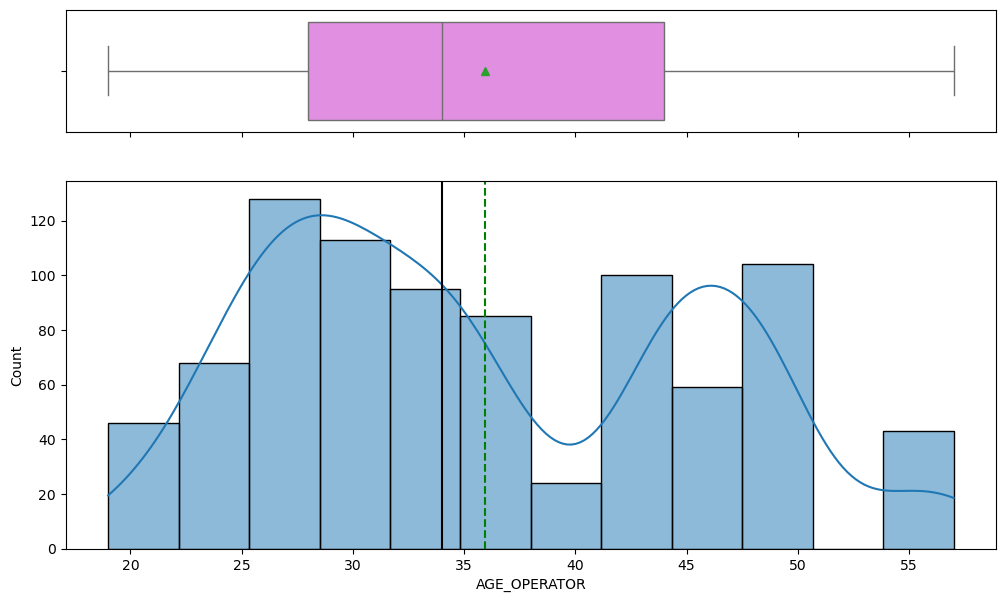

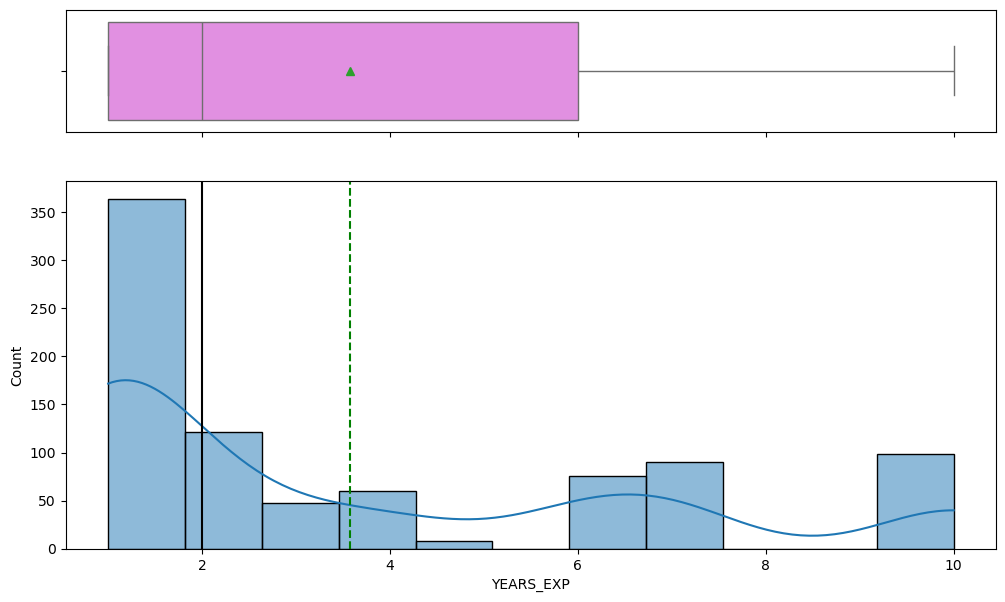

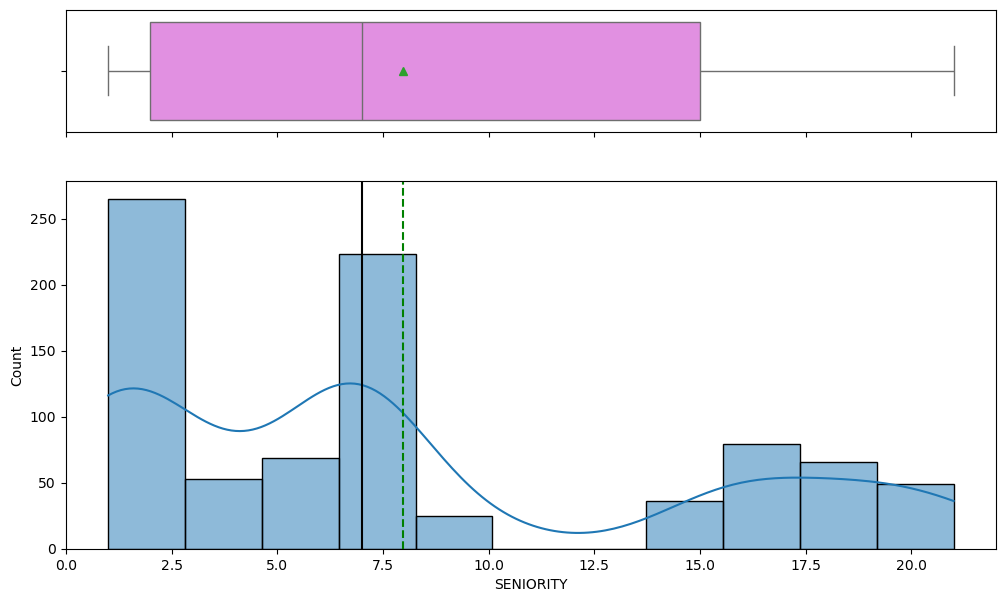

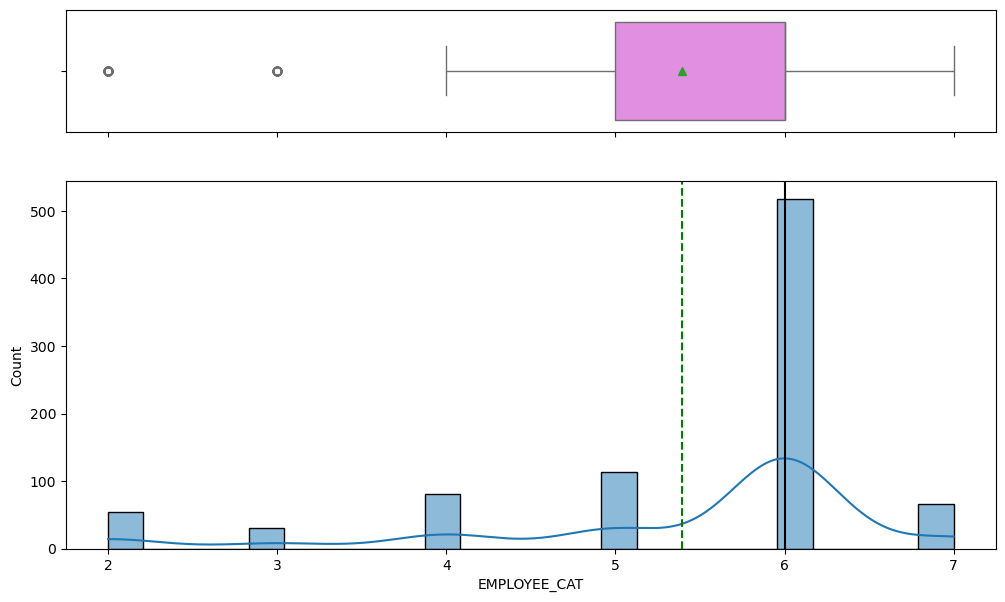

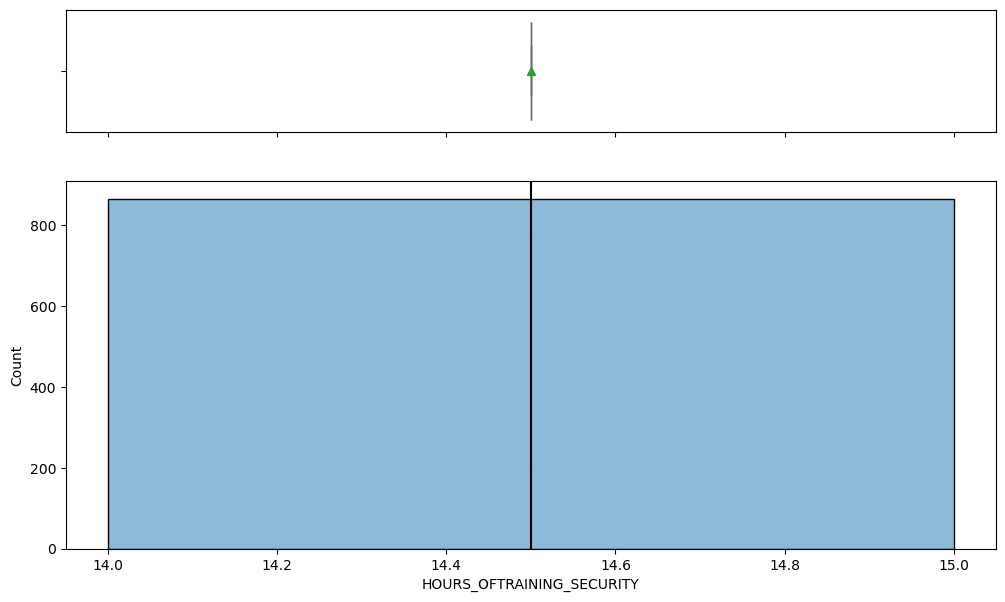

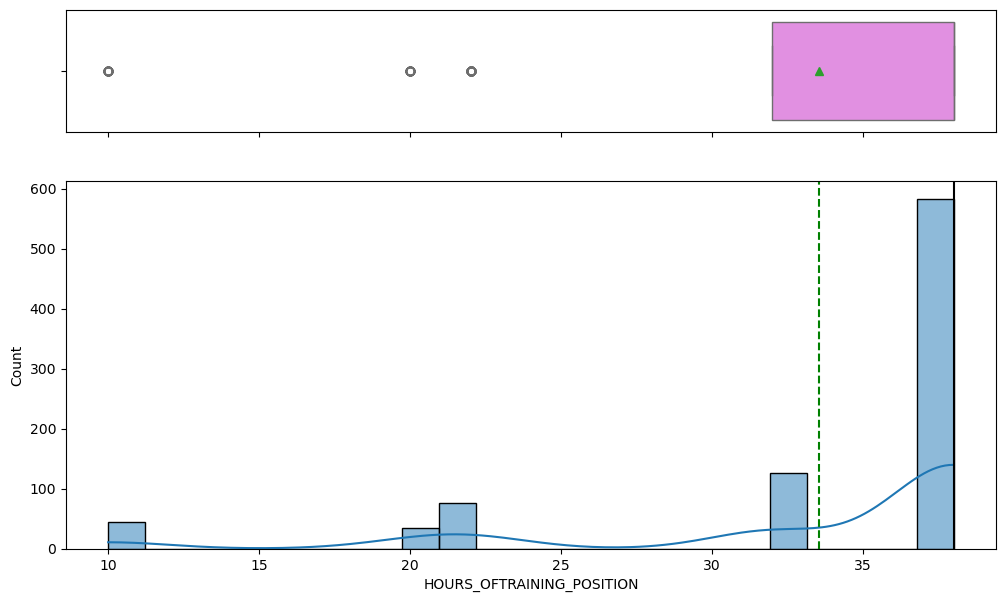

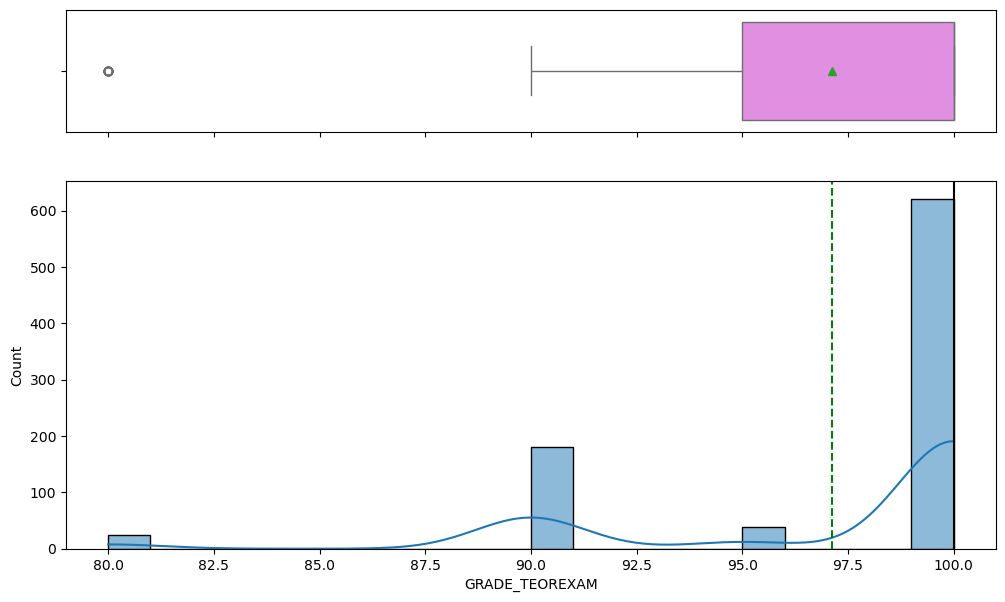

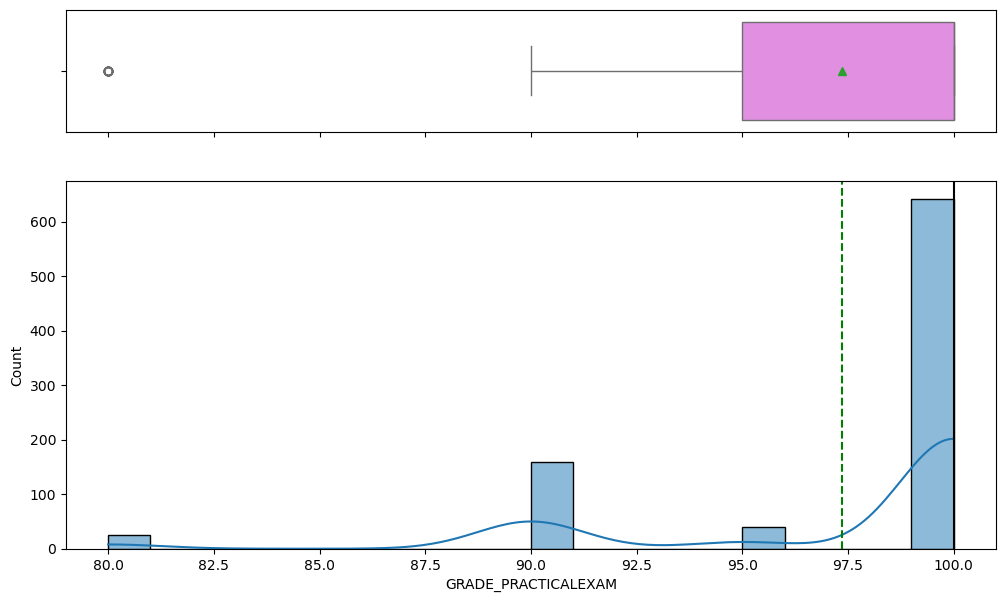

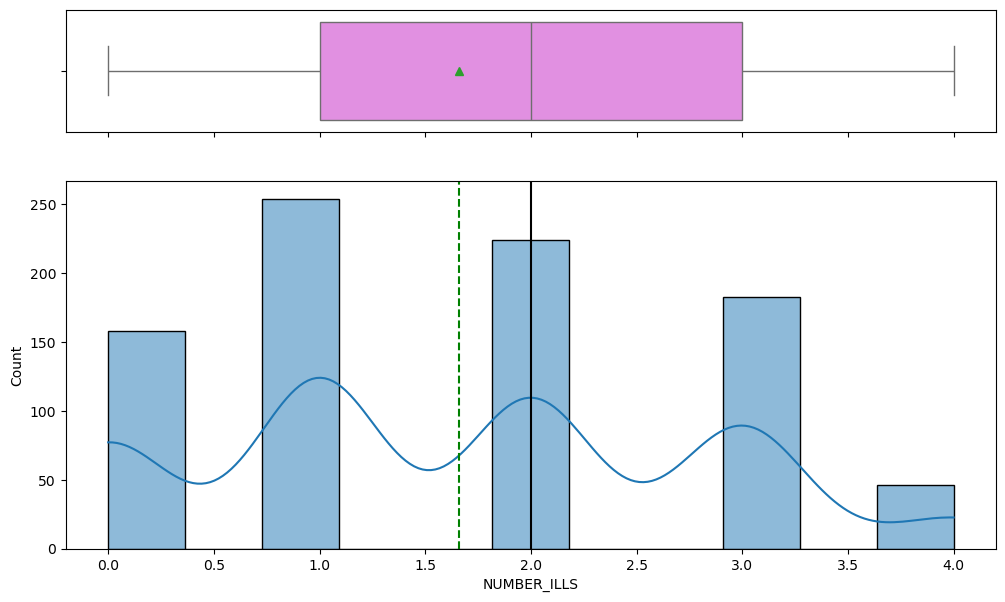

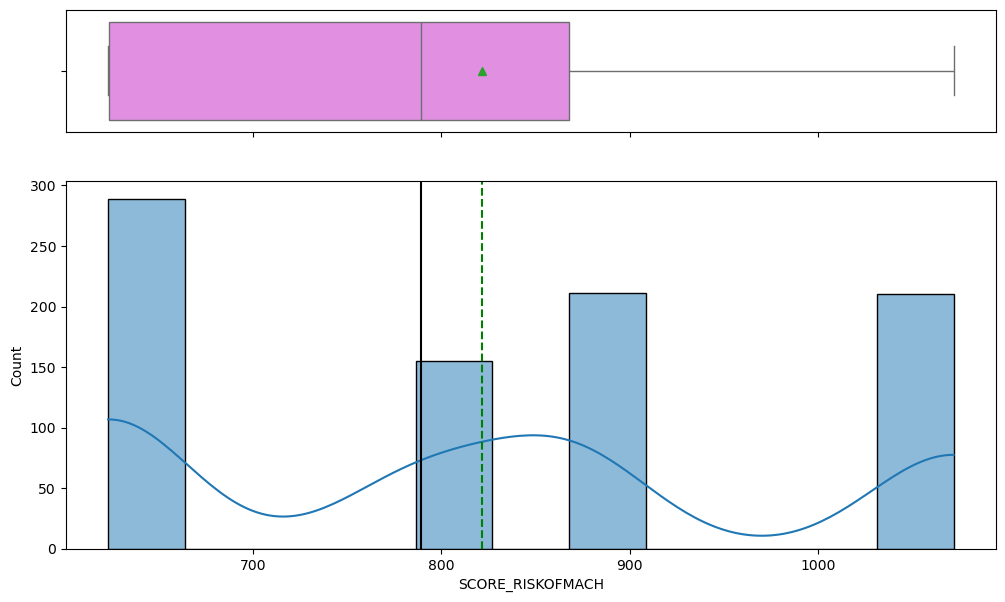

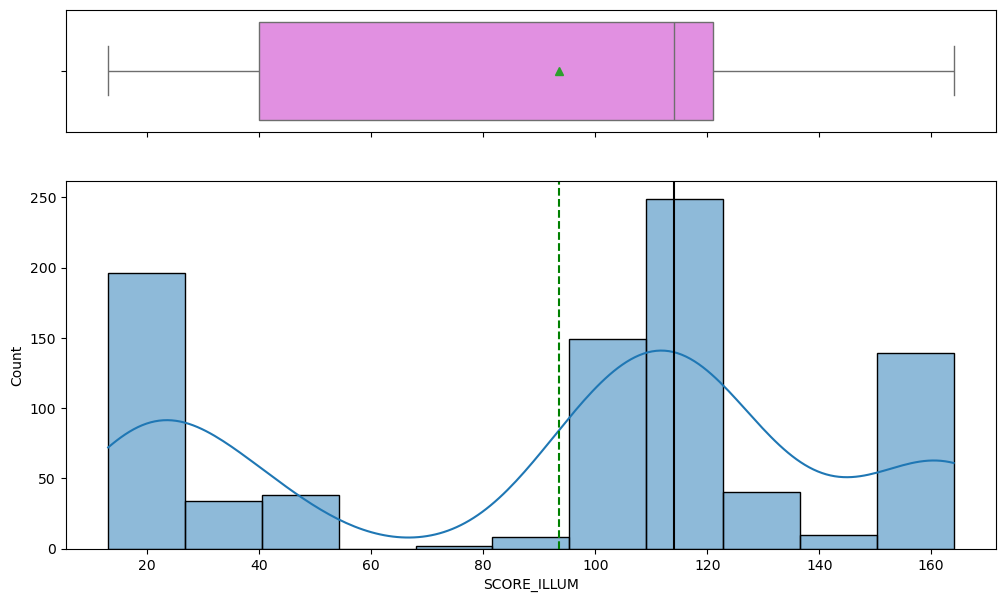

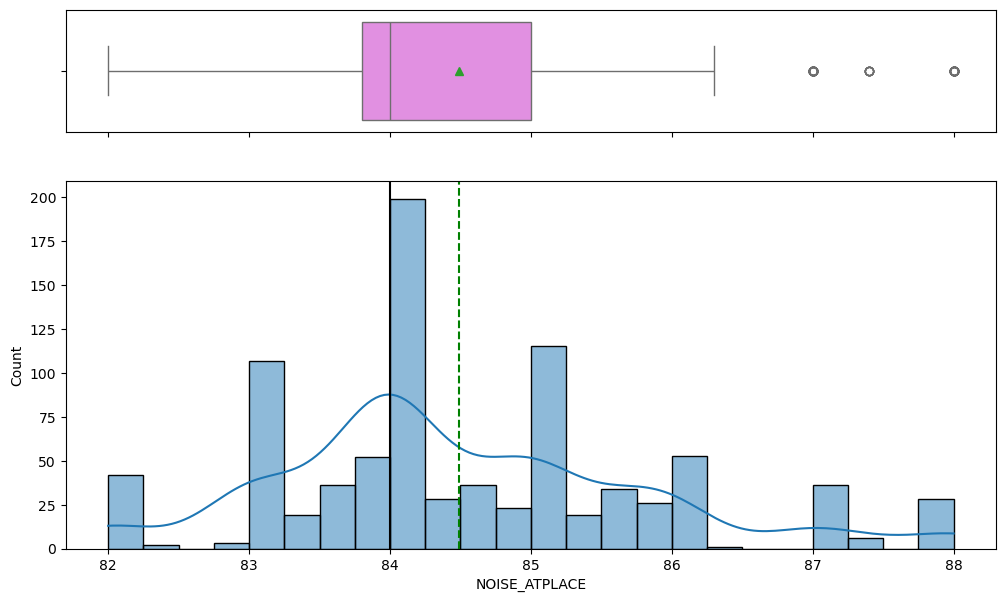

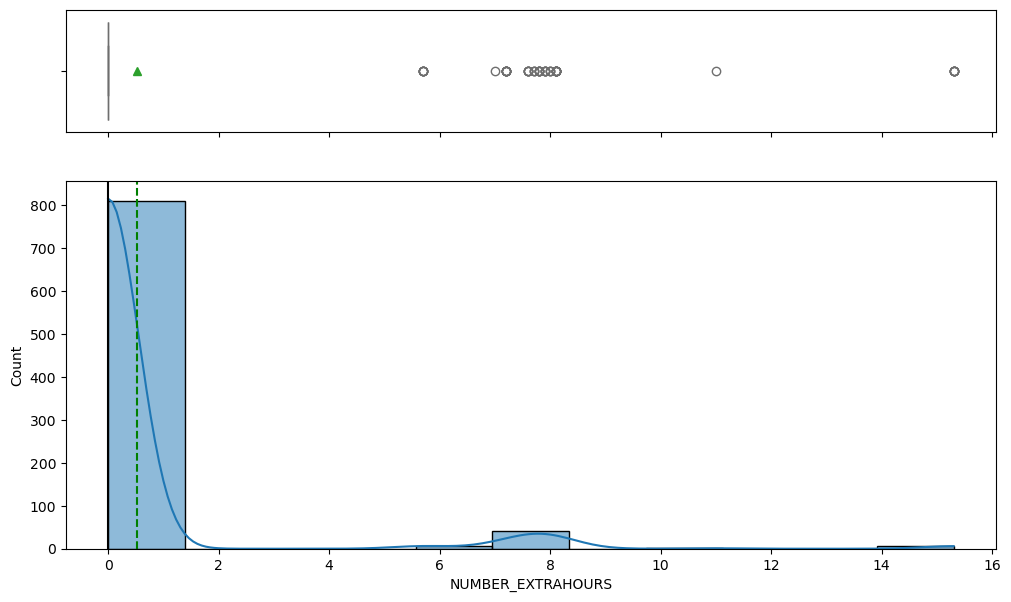

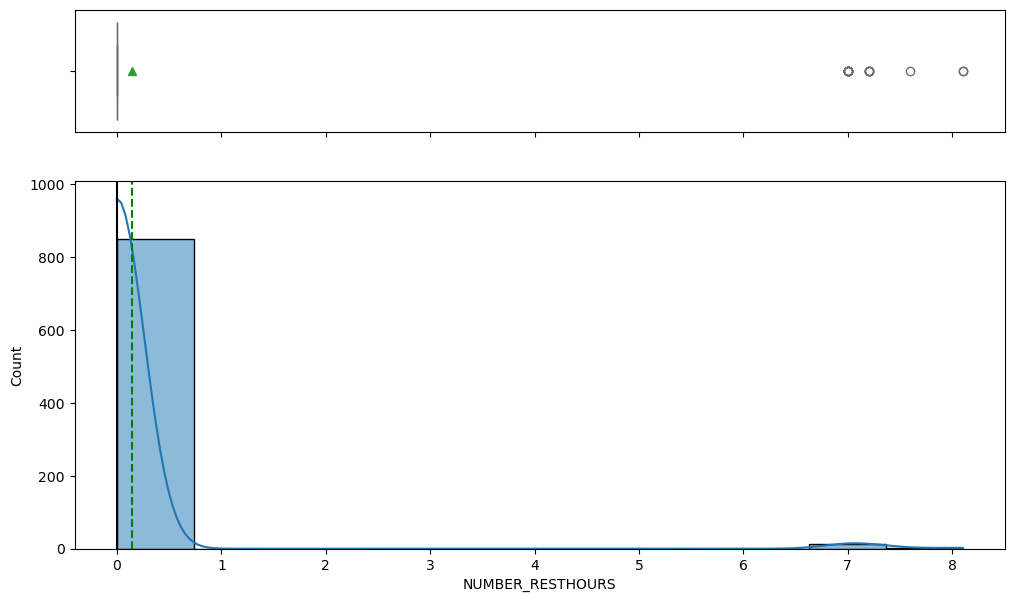

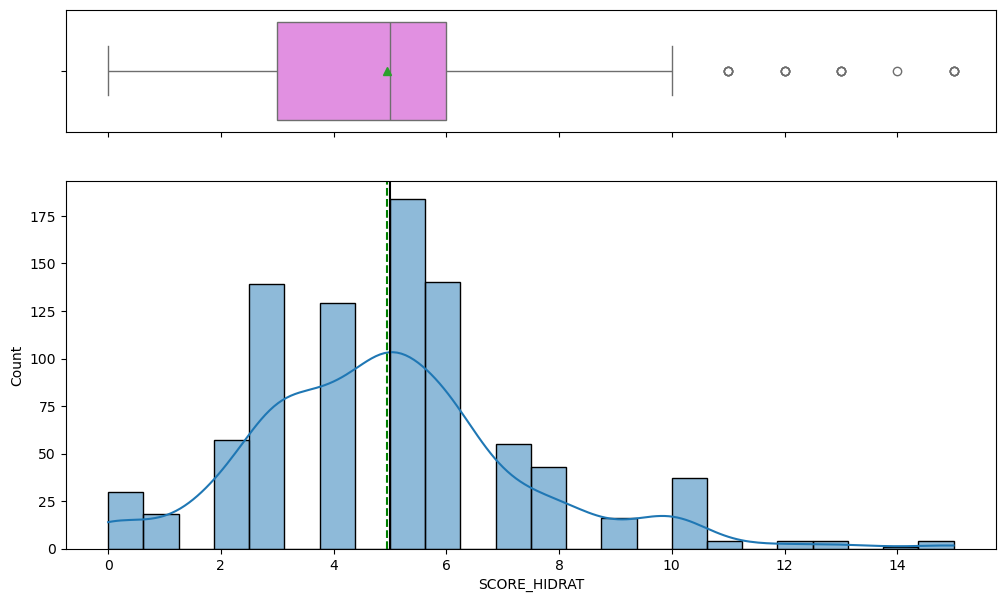

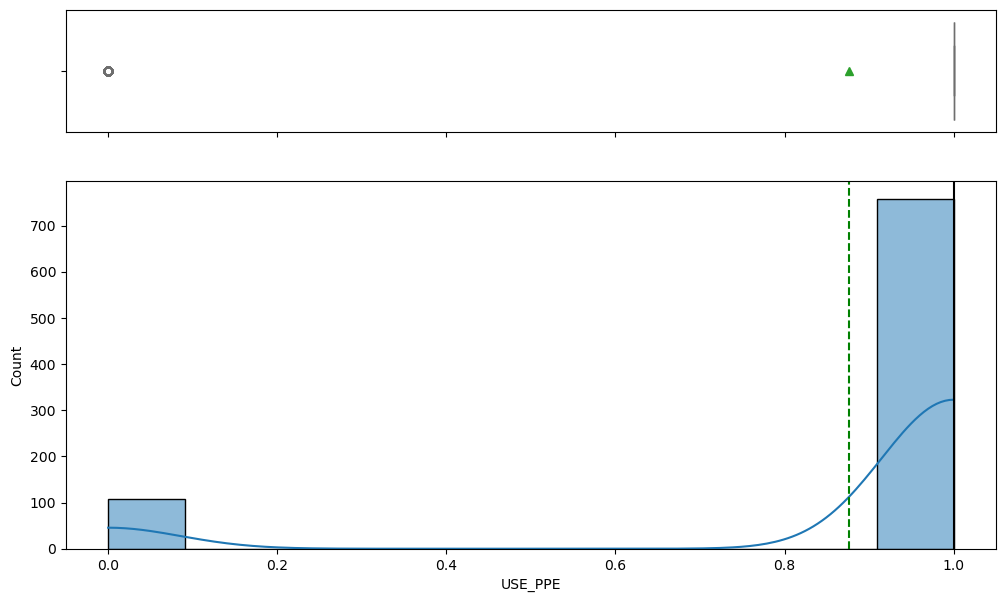

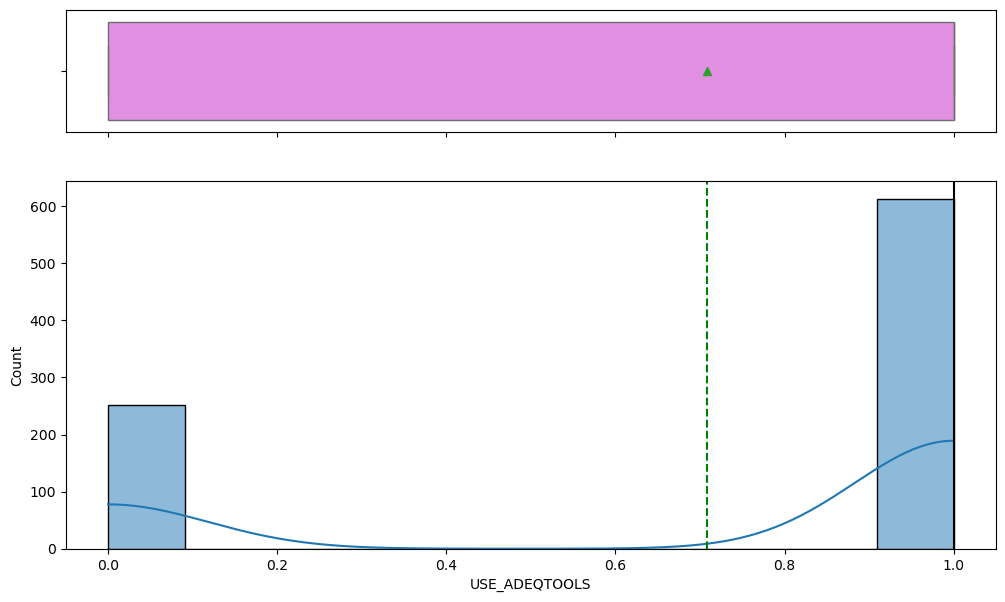

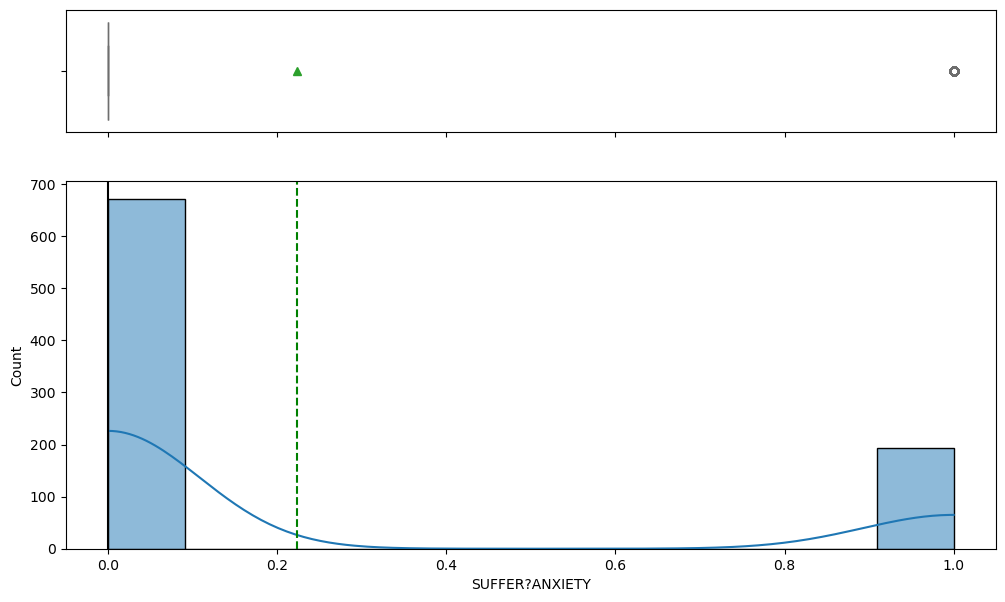

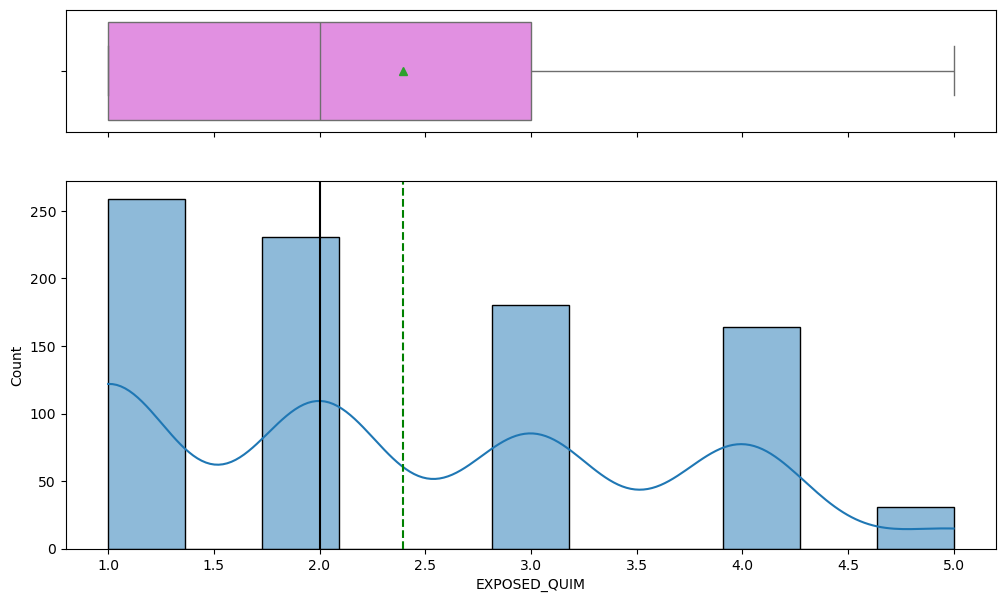

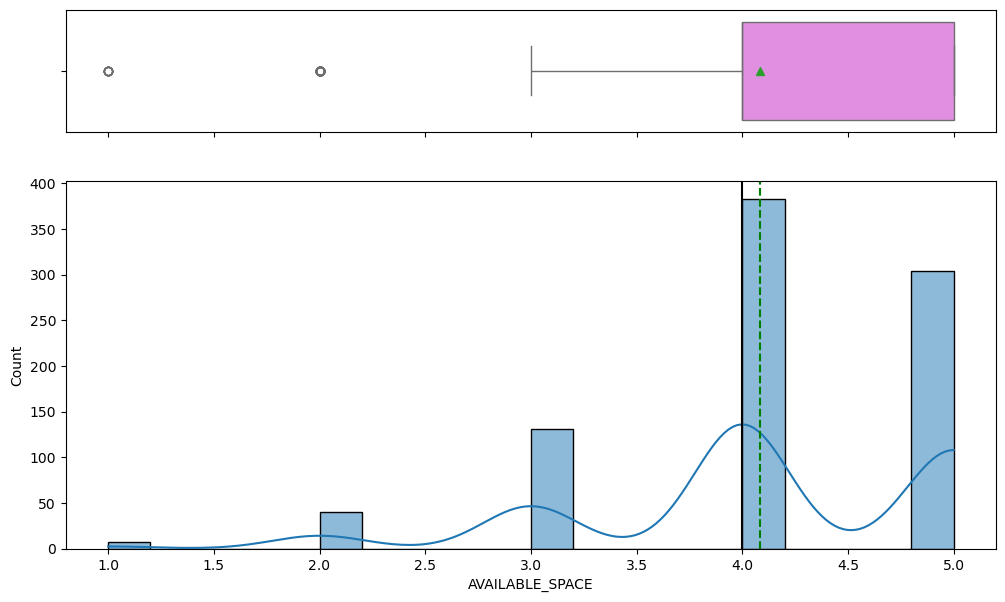

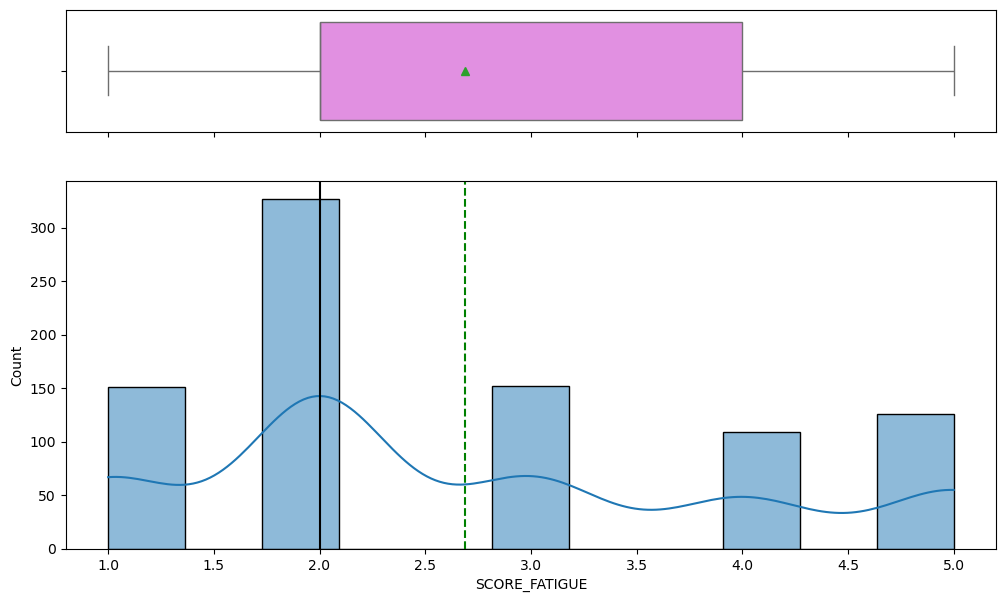

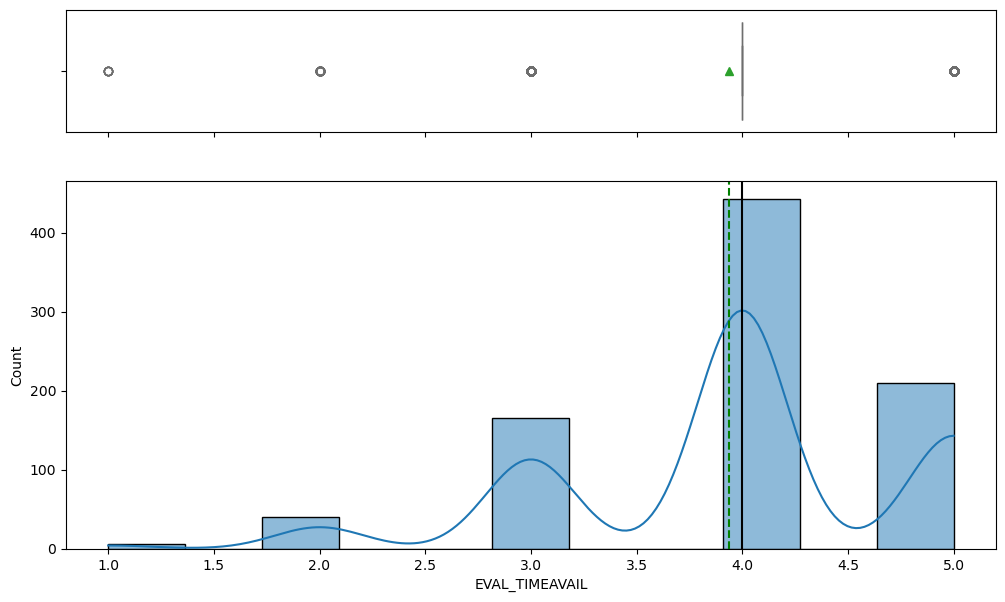

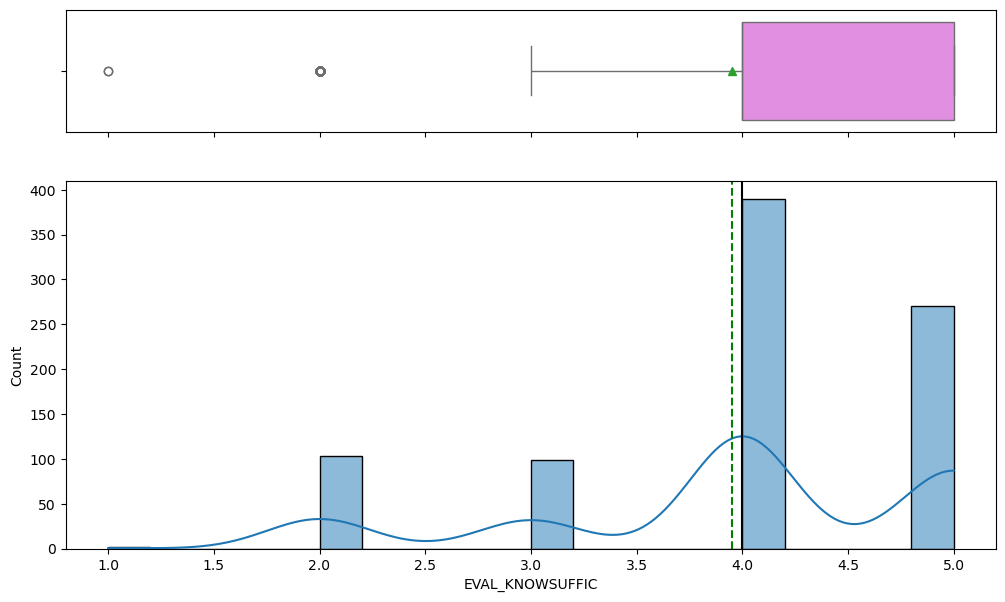

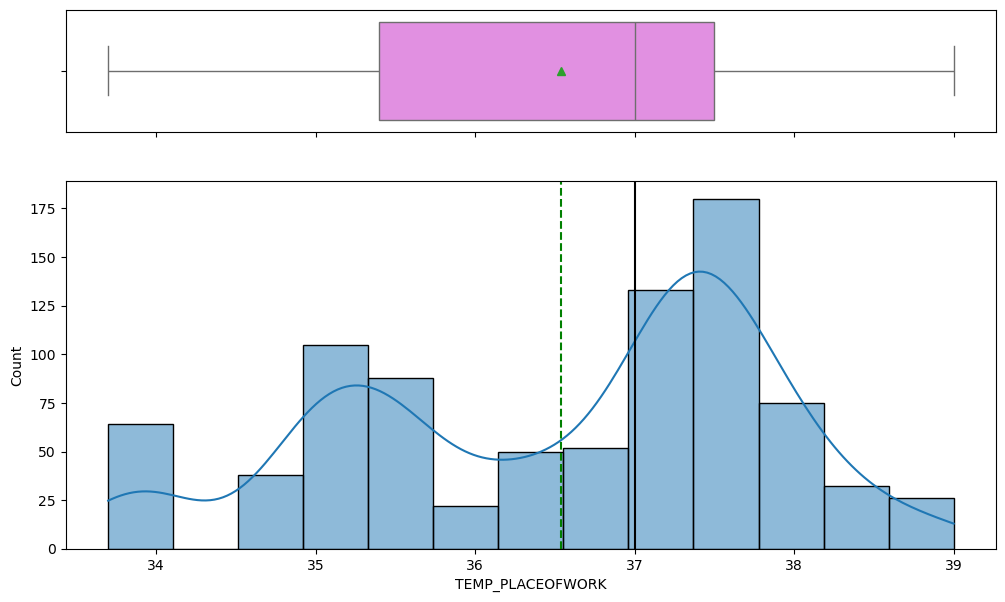

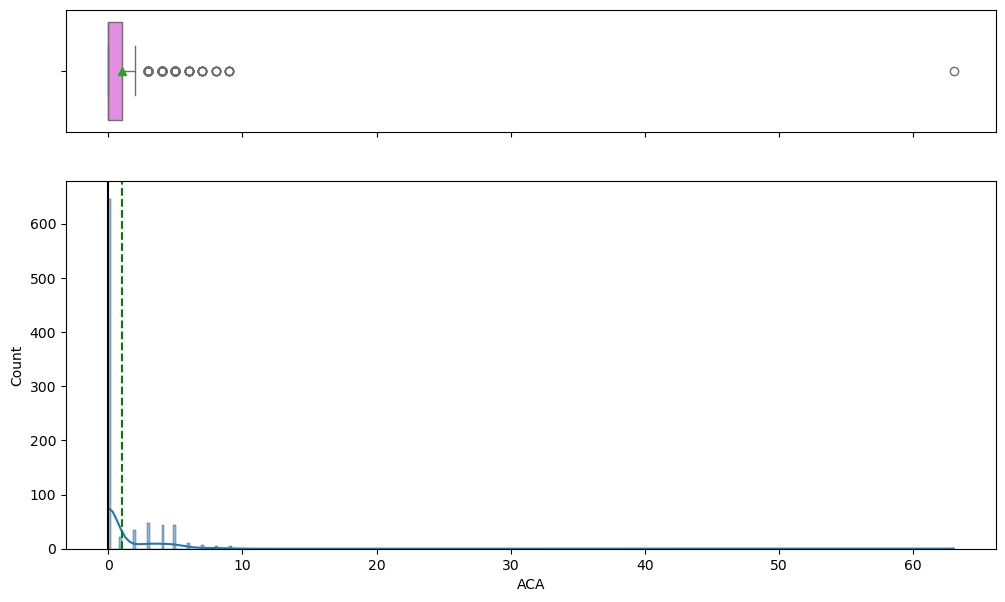

In [18]:
# Iterate over each column in the dataframe and apply the histogram_boxplot function
import matplotlib.pyplot as plt
import seaborn as sns

for column in data.columns:
    histogram_boxplot(data, column)
    plt.show()

In [ ]:
Model-  Boxplot and Histogram  

The analysis of the data reveals various trends across multiple variables. The age distribution of operators shows a concentration between 20-35 years, with a smaller number in the 42-55 age range. When it comes to years of experience, most employees have between 1-3 years of experience, while a few have 6-10 years. The seniority levels are also skewed, with the majority of employees having 0-7.5 years of seniority, and fewer employees falling in the 15-20 year range. 

In terms of employee categories, the majority of employees fall under category 6. The number of hours of security training shows little variation, mostly ranging between 14 and 15 hours, while the hours of position training are more varied. Most employees received between 30 and 40 hours of position training, though some had only 10 hours, and a slightly higher amount received between 20-23 hours. 

Regarding grading metrics, the distribution of grades to reexamine shows that grade 100 had around 600 occurrences, grade 95 had about 50 occurrences, and grade 90 had about 200 occurrences. For the practical exam, grade 90 had approximately 200 occurrences, grade 95 had 50 occurrences, and grade 100 had about 600 occurrences. 

The number of illnesses showed a significant spread: between 0 and 0.5 illnesses occurred 150 times, between 0.75 and 1.1 illnesses occurred 250 times, 2.0 illnesses occurred 250 times, 3.0 illnesses occurred 175 times, and 3.6 illnesses occurred 50 times. Lastly, the score for the risk of machines showed that scores between 200-400 occurred 275 times, scores of 800 occurred 150 times, and scores near 900 appeared 200 times. 

This overall pattern shows that most variables exhibit clear trends with a few outliers. For example, the number of illnesses is widely spread, while the training hours for positions and grade distributions suggest more concentrated ranges, indicating common levels of performance and training among employees. 

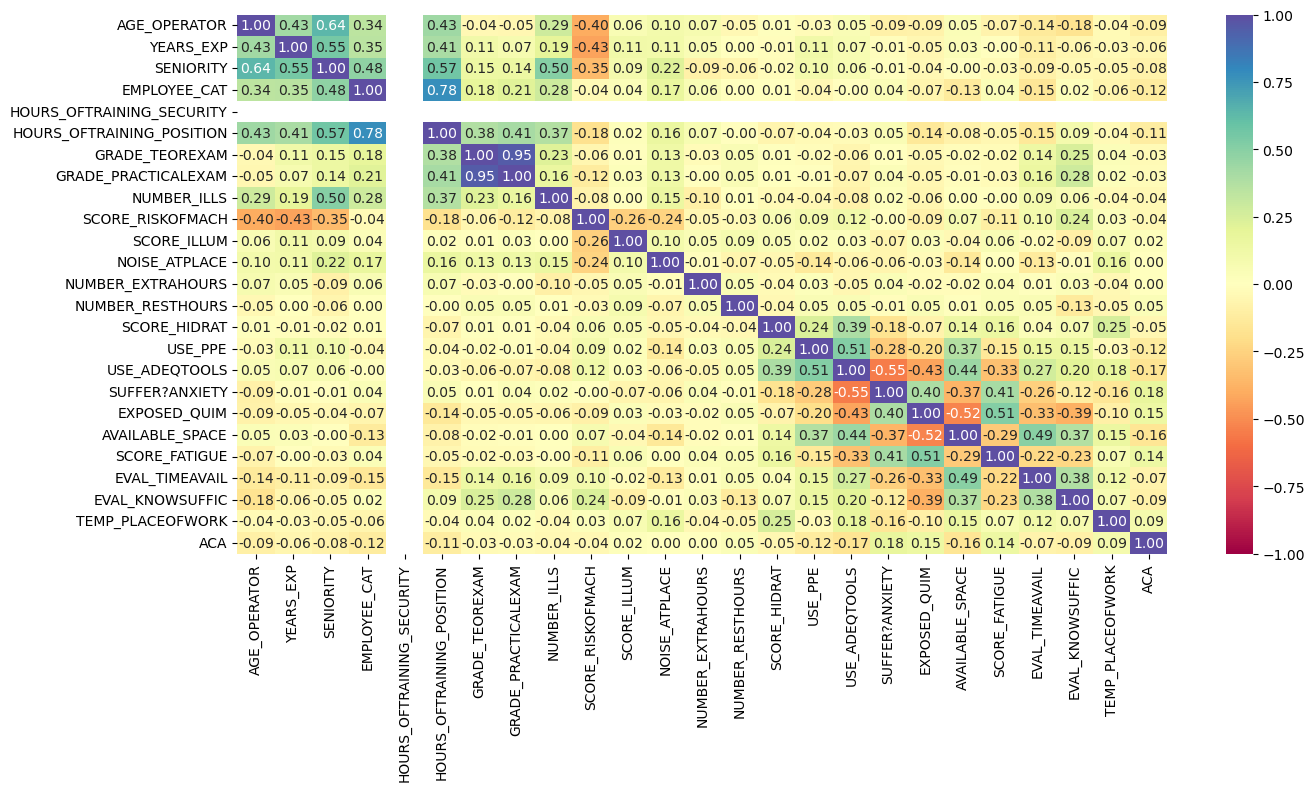

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
 Model 7 heat map 

Heatmap Insights: 

Looking at the heatmap, I noticed that "hidra" and "eval_knowsuffice" seem to be more correlated than before, which might mean they affect each other more than I originally thought. Also, there’s a visible relationship between "hours of training" and "age of operator", which is kind of interesting because it suggests that older operators might have different training patterns compared to younger ones. 

These observations could help improve how we optimize the models—like tweaking hyperparameters based on which variables are strongly correlated. It might lead to better results, especially in terms of RMSE, R², MAE for regression models, and accuracy, TP, TN, FP, FN for classification models. 

In [ ]:
Exploratory Analysis :This code uses the StandardScaler from sklearn.preprocessing to standardize specific numerical columns in a dataset named database. The columns selected for scaling are 'SCORE_RISKOFMACH', 'SCORE_ILLUM', 'TEMP_PLACEOFWORK', and 'ACA'. Standardization transforms these features to have a mean of 0 and a standard deviation of 1, which helps improve the performance of machine learning models by ensuring that all features contribute equally. The scaler.fit_transform() method is applied to the selected columns, replacing their original values with the standardized ones. Finally, the print(database.describe()) command is used to display summary statistics of the updated dataset, allowing verification of the applied transformation. 

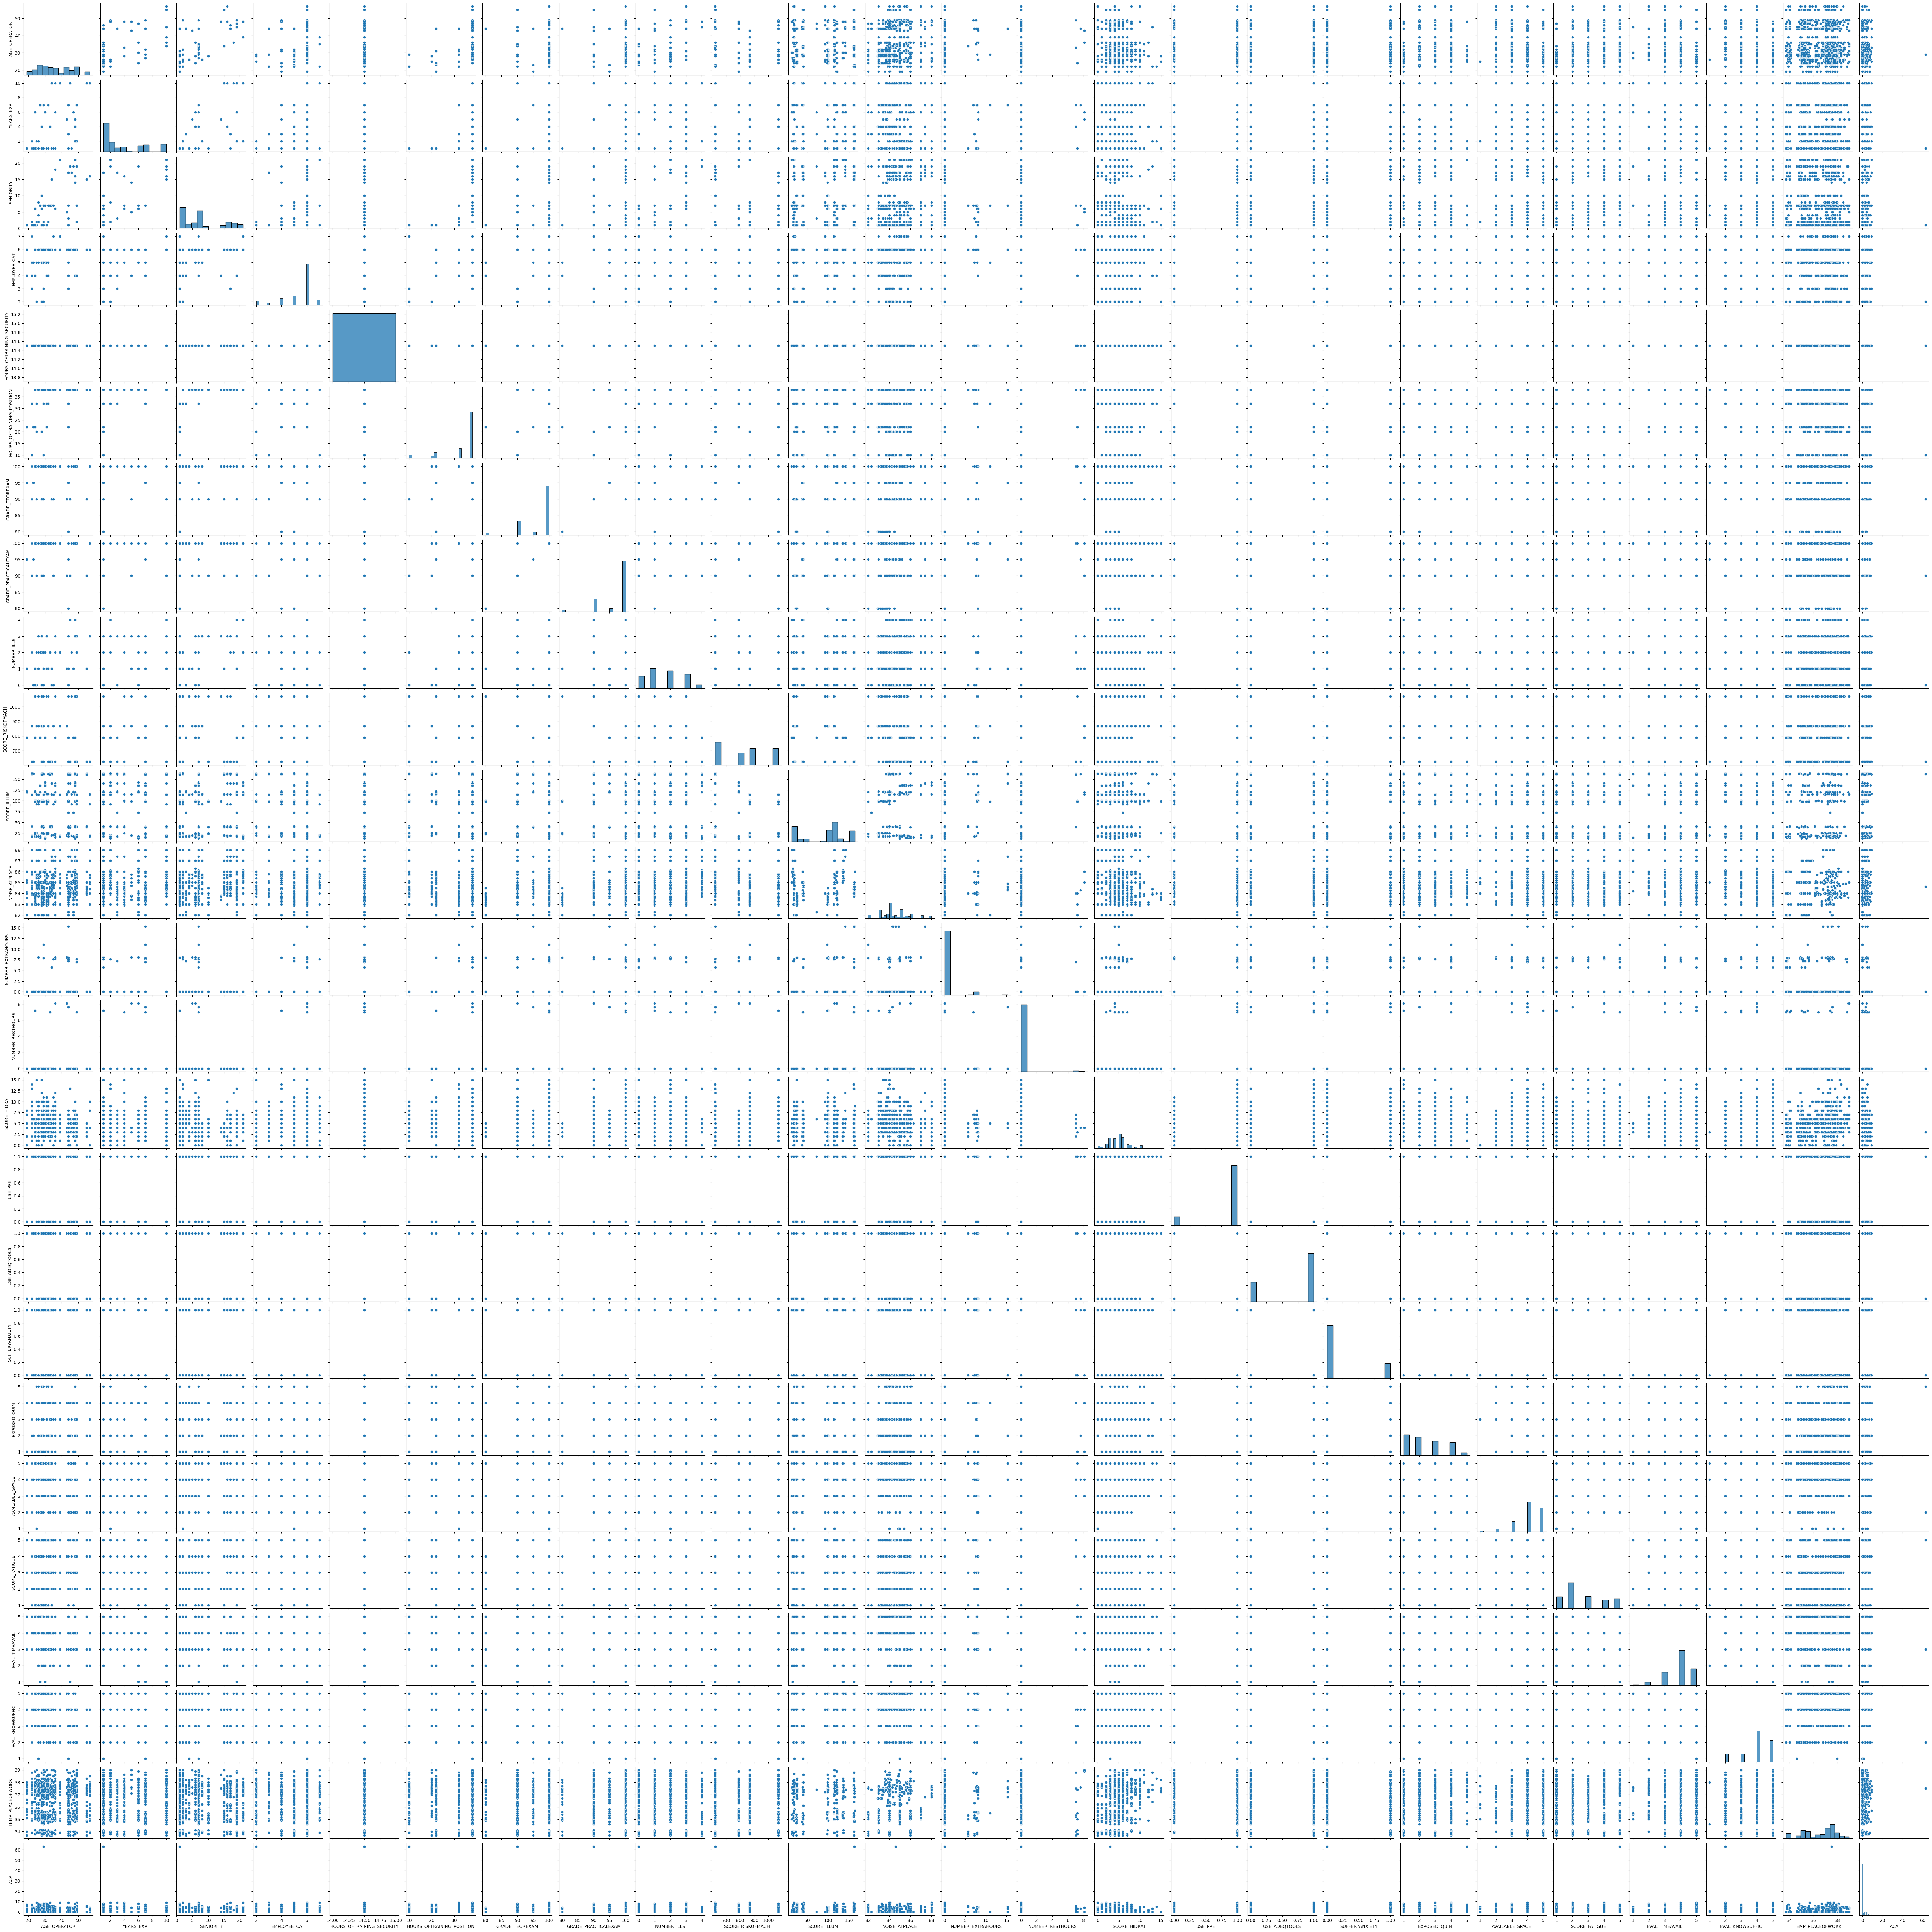

In [24]:
sns.pairplot(data=data)

In [ ]:
Model- SNS pairplot showed some correlation between value but I found it difficult to analyze the information; 

Insights from Pairplot: 

The pairplot has been really helpful in visualizing the relationships between the different variables. It’s clear that some pairs of features, like "feature_x" and "feature_y", are strongly correlated, which could be useful for our analysis. Other pairs show more scattered relationships, which might suggest weaker associations. 

For categorical outcomes, the pairplot can show us how well the different categories separate. If the points for each class are spread out in a way that makes it easy to distinguish them, then the model might be working well. If not, we may need to rethink our features or model choices. 

For the numerical outcomes, the pairplot helps identify trends or groupings that could lead to better predictive performance. It gives us a visual representation of the data that might point us toward adjusting the model to improve predictions. 

Based on the patterns in the pairplot and the hyperparameter tuning, we can see that Model 1 might benefit from some additional tuning or even feature engineering to better capture the relationships between the variables. This analysis of the pairplot and the metrics helps us better understand which features are most important, which can guide further improvements to our models. 

In [25]:
# Create the set of independent variables (X) and the dependent variable (y)
X = data.drop(["SCORE_FATIGUE"], axis=1)  # Drop the target variable from the features
y = data["SCORE_FATIGUE"]  # Set the dependent variable

In [26]:
X

AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
0              36          6          6             6   
1              19          1          1             6   
2              39         10         21             6   
3              22          1          1             7   
4              26          1          4             6   
..            ...        ...        ...           ...   
860            26          1          4             6   
861            28          1          1             2   
862            55         10         15             6   
863            24          1          1             4   
864            36          1          6             6   

     HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0                         14.5                         38             100   
1                         14.5                         22              95   
2                         14.5                         38             100   
3                         14.5                         10              90   
4                         14.5                         38             100   
..                         ...                        ...             ...   
860                       14.5                         38             100   
861                       14.5                         20             100   
862                       14.5                         38              90   
863                       14.5                         22             100   
864                       14.5                         38             100   

     GRADE_PRACTICALEXAM  NUMBER_ILLS  SCORE_RISKOFMACH  ...  SCORE_HIDRAT  \
0                    100            3             789.0  ...             3   
1                     95            1             789.0  ...             7   
2                    100            2             868.0  ...             6   
3                     90            2             868.0  ...             8   
4                    100            1            1072.0  ...             5   
..                   ...          ...               ...  ...           ...   
860                  100            1            1072.0  ...             3   
861                  100            0             623.8  ...             5   
862                   90            1             623.9  ...             4   
863                  100            1            1072.0  ...             3   
864                  100            2            1072.0  ...             6   

     USE_PPE  USE_ADEQTOOLS  SUFFER?ANXIETY  EXPOSED_QUIM  AVAILABLE_SPACE  \
0          1              1               1             1                4   
1          1              1               0             1                4   
2          1              1               0             4                3   
3          1              1               0             3                5   
4          1              1               0             2                4   
..       ...            ...             ...           ...              ...   
860        1              1               0             2                4   
861        1              1               0             3                4   
862        1              1               0             2                5   
863        1              1               0             1                5   
864        1              1               0             3                5   

     EVAL_TIMEAVAIL  EVAL_KNOWSUFFIC  TEMP_PLACEOFWORK  ACA  
0                 4                4              36.7    0  
1                 4                4              36.3    0  
2                 4                5              36.3    0  
3                 5                5              36.3    4  
4                 4                4              36.3    0  
..              ...              ...               ...  ...  
860               4                4              35.5    0  
861               4      

In [28]:
y

0      3
1      2
2      4
3      5
4      2
      ..
860    2
861    2
862    2
863    1
864    2
Name: SCORE_FATIGUE, Length: 865, dtype: int64

In [29]:
type(y)

pandas.core.series.Series

In [32]:
import statsmodels.api as sm


In [33]:
#Running the model
# Add a constant term to the predictor variable set
# statmodelS does not do by default
import statsmodels.api as sm

# Add a constant term to the predictor variable set
X_with_constant = sm.add_constant(X)

# Running the OLS model
model1 = sm.OLS(y, X_with_constant)
results1 = model1.fit()

# Summarize the results
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:          SCORE_FATIGUE   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     26.81
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.56e-84
Time:                        16:01:07   Log-Likelihood:                -1216.2
No. Observations:                 865   AIC:                             2480.
Df Residuals:                     841   BIC:                             2595.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AGE_OPERATOR          

In [34]:
# Use the summary() method on the results1 object to see a more
# detailed report
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_FATIGUE   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     26.81
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.56e-84
Time:                        16:02:21   Log-Likelihood:                -1216.2
No. Observations:                 865   AIC:                             2480.
Df Residuals:                     841   BIC:                             2595.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AGE_OPERATOR          

In [ ]:
OLS Regression Results 

The model summary for the dependent variable SCORE_FATIGUE reveals an R-squared of 0.423, indicating that the model explains approximately 42.3% of the variance in fatigue scores, which is considered moderate. The adjusted R-squared value of 0.407 takes into account the number of predictors and adjusts for the inclusion of irrelevant variables. The F-statistic of 26.81, with a p-value of 1.56e-84, indicates that the model as a whole is statistically significant. The number of observations in the model is 865, and the AIC and BIC values are 2480 and 2595, respectively. 

Several key variables were found to significantly affect the fatigue score. These include EMPLOYEE_CAT, which has a positive effect on fatigue, GRADE_TEOREXAM with a positive effect, GRADE_PRACTICALEXAM with a negative effect, SCORE_RISKOFMACH with a negative effect, SCORE_HIDRAT with a positive effect, USE_ADEQTOOLS with a negative effect, SUFFER?ANXIETY with a positive effect, EXPOSED_QUIM with a positive effect, and TEMP_PLACEOFWORK with a positive effect. On the other hand, variables such as YEARS_EXP, SENIORITY, NUMBER_ILLS, NOISE_ATPLACE, AVAILABLE_SPACE, EVAL_TIMEAVAIL, EVAL_KNOWSUFFIC, and ACA were not statistically significant, as their p-values were greater than 0.05, suggesting they do not have a significant impact on the dependent variable in this model. 

From a diagnostic perspective, the Omnibus test p-value of 0.003 suggests that the residuals are not perfectly normally distributed, and the Durbin-Watson statistic of 1.802 indicates a relatively low likelihood of autocorrelation in the residuals. The Jarque-Bera test, with a p-value of 0.00213, further confirms that the residuals deviate from normality. 

Overall, this regression model serves as a good starting point for understanding factors that contribute to fatigue. It highlights several significant predictors, particularly related to employee characteristics and environmental factors. However, further refinement of the model may be necessary to improve the fit and address the non-significant variables. 

 

In [ ]:
The analysis reveals that not all variables equally explain the dependent variable, SCORE_FATIGUE. The key contributors include:

AGE_OPERATOR
EMPLOYEE_CAT
GRADE_TEOREXAM
GRADE_PRACTICALEXAM
SCORE_RISKOFMACH
SCORE_HIDRAT
USE_ADEQTOOLS
SUFFER?ANXIETY
EXPOSED_QUIM
TEMP_PLACEOFWORK
Together, these variables account for 42.3% of the variance in SCORE_FATIGUE (R-squared = 0.423).

In [35]:
# Define the backward selection function
def backward_selection(data, target, significance_level = 0.05):
    initial_features = data.columns.tolist()
    best_features = initial_features[:]
    while len(best_features) > 0:
        features_with_constant = sm.add_constant(data[best_features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            best_features.remove(excluded_feature)
        else:
            break
    return best_features


In [36]:
# Get the selected features using backward selection
selected_features = backward_selection(X, y)

# Fit the model using only the selected features
model2 = sm.OLS(y, sm.add_constant(data[selected_features])).fit()

# Output the summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_FATIGUE   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     59.92
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.09e-91
Time:                        16:09:58   Log-Likelihood:                -1224.1
No. Observations:                 865   AIC:                             2470.
Df Residuals:                     854   BIC:                             2523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0906    

In [ ]:
Model 2, which includes only the significant variables, is the optimal model, achieving an adjusted R-squared of 0.405. This indicates a moderate level of explanatory power of the predictors for the dependent variable.

In [37]:
# Getting leverage statistics
influence = model2.get_influence()
leverage = influence.hat_matrix_diag

# Creating a DataFrame that includes the leverage values alongside your variables:
import pandas as pd
leverage_df = pd.DataFrame({
    'AGE_OPERATOR': X['AGE_OPERATOR'],
    'EMPLOYEE_CAT': X['EMPLOYEE_CAT'],
    'GRADE_TEOREXAM': X['GRADE_TEOREXAM'],
    'GRADE_PRACTICALEXAM': X['GRADE_PRACTICALEXAM'],
    'SCORE_RISKOFMACH': X['SCORE_RISKOFMACH'],
    'SCORE_HIDRAT': X['SCORE_HIDRAT'],
    'USE_ADEQTOOLS': X['USE_ADEQTOOLS'],
    'SUFFER?ANXIETY': X['SUFFER?ANXIETY'],
    'EXPOSED_QUIM': X['EXPOSED_QUIM'],
    'TEMP_PLACEOFWORK': X['TEMP_PLACEOFWORK'],
    'Leverage': leverage
})

print(leverage_df)


     AGE_OPERATOR  EMPLOYEE_CAT  GRADE_TEOREXAM  GRADE_PRACTICALEXAM  \
0              36             6             100                  100   
1              19             6              95                   95   
2              39             6             100                  100   
3              22             7              90                   90   
4              26             6             100                  100   
..            ...           ...             ...                  ...   
860            26             6             100                  100   
861            28             2             100                  100   
862            55             6              90                   90   
863            24             4             100                  100   
864            36             6             100                  100   

     SCORE_RISKOFMACH  SCORE_HIDRAT  USE_ADEQTOOLS  SUFFER?ANXIETY  \
0               789.0             3              1               

In [38]:
# Filter the DataFrame for rows where leverage is greater than 0.019
high_leverage_rows = leverage_df[leverage_df['Leverage'] > 0.019]

print("Rows with leverage greater than 0.019:")
print(high_leverage_rows)


Rows with leverage greater than 0.019:
     AGE_OPERATOR  EMPLOYEE_CAT  GRADE_TEOREXAM  GRADE_PRACTICALEXAM  \
19             22             4             100                  100   
30             34             6              90                  100   
33             44             5              80                   80   
41             28             2             100                  100   
51             35             7              90                   90   
..            ...           ...             ...                  ...   
784            34             6              90                  100   
787            44             4              80                   80   
819            44             4              80                   80   
830            29             2              90                   90   
859            44             4              80                   80   

     SCORE_RISKOFMACH  SCORE_HIDRAT  USE_ADEQTOOLS  SUFFER?ANXIETY  \
19              623.1     

In [39]:
# Filtering the DataFrame for rows where leverage is greater than 0.019
high_leverage_rows = leverage_df[leverage_df['Leverage'] > 0.019]

# Count the number of rows with leverage greater than 0.019
num_high_leverage_rows = high_leverage_rows.shape[0]

print(f"Number of rows with leverage greater than 0.019: {num_high_leverage_rows}")


Number of rows with leverage greater than 0.019: 107


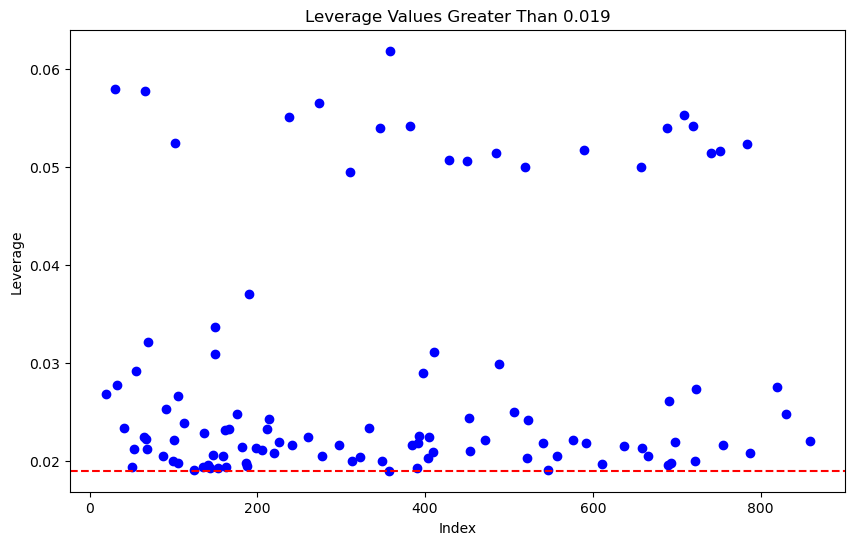

In [40]:
import matplotlib.pyplot as plt

# Assuming high_leverage_rows is the DataFrame with rows where leverage is greater than 0.019

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(high_leverage_rows.index, high_leverage_rows['Leverage'], color='blue')  # Scatter plot of leverage values
plt.axhline(y=0.019, color='r', linestyle='--')  # Horizontal line at leverage value 0.019

# Labeling the axes
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage Values Greater Than 0.019')

# Show the plot
plt.show()

In [ ]:
Model 1- Leverage Values Greater Than 0.019 

In the scatter plot of leverage values, I noticed that around 22 data points were above the 0.05 leverage threshold, suggesting these points might have a bigger impact on the model's predictions. Most of the other data points were below the 0.03 to 0.02 range, with just a few scattered between these values. This indicates that most of the data points have relatively low leverage, meaning they have less influence on the model, but the points above the 0.05 threshold could be worth investigating since they might disproportionately affect the results. 

Key Takeaway: For the scatter plot of leverage, the main goal is to identify any outliers with high leverage. After that, if the model is producing numerical predictions (even if they're not directly shown in the plot), I would need to rely on metrics like R² (Adjusted) and possibly RMSE/MAE to evaluate the model’s performance.

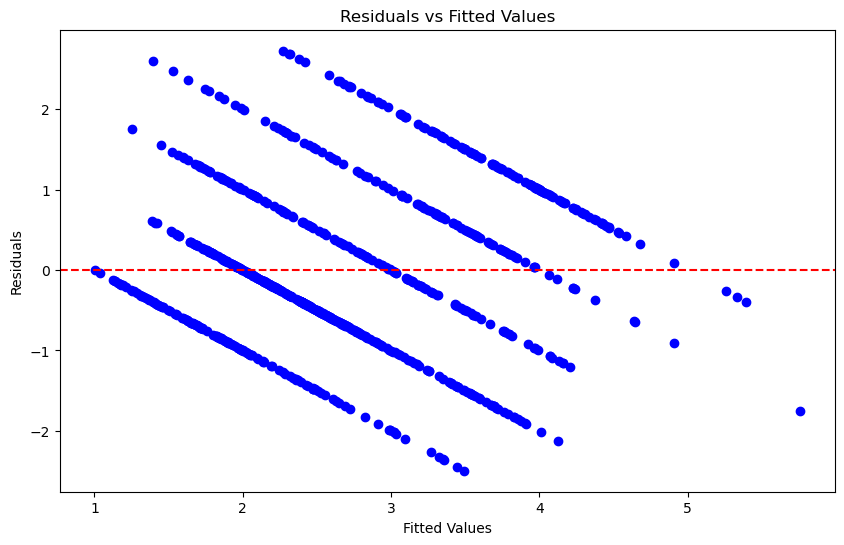

In [41]:
# Calculate fitted values and residuals from ou best model
fitted_values = model2.fittedvalues
residuals = model2.resid

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue')

# Adding a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')

# Labeling the axes
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Show the plot
plt.show()

In [ ]:
Exploratory Analysis: This code checks how well a model fits the data by analyzing residuals (errors). 

First, it calculates fitted values (model2.fittedvalues), which are the predicted values from the model, and residuals (model2.resid), which are the differences between actual and predicted values. 

Then, it creates a scatter plot where fitted values are on the x-axis and residuals are on the y-axis. Ideally, residuals should be randomly scattered around zero, meaning the model’s errors have no pattern. A red dashed line at zero helps visualize this. 

This plot is useful for spotting issues like non-random patterns, which could indicate that the model isn’t capturing all trends in the data. Finally, plt.show() displays the plot.

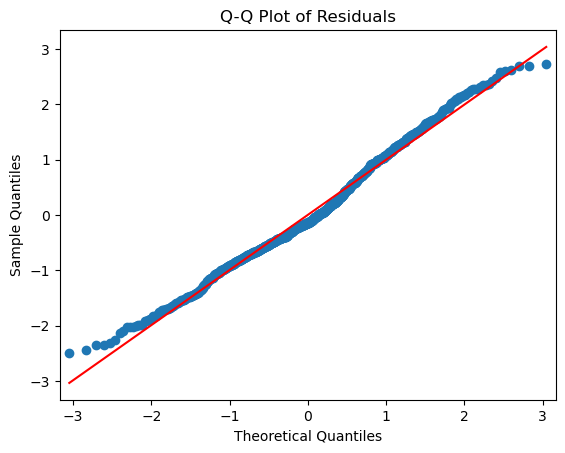

In [42]:
# Extracting the residuals from the model
residuals = model2.resid

# Generating a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line

# setting title and labels for the plot
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


In [ ]:
Model 3 - Q-Q Plot of Residuals 

In the Q-Q plot of residuals, I observed that as the model's residuals approach the (0, 0) point, where the theoretical and sample quantities align, the data points generally cluster around the red line, indicating a positive trend. This suggests that for the majority of the data, the residuals are fairly consistent with the expected distribution. However, at the extreme ends of the plot, around the points (-3, -3) and (3, 3), the dots deviate from the red line, showing less consistency in the trend. This deviation suggests that there are some residuals in the tails of the distribution that don't align well with the expected normal distribution, possibly indicating outliers or non-normality in the data. 

Key Takeaway: The Q-Q plot is useful for checking the normality of residuals. The closer the data points are to the red line, the better the residuals align with a normal distribution. The deviations at the extreme ends suggest that there may be some outliers or unusual patterns in the residuals, which could affect the model's performance. If the model is producing numerical predictions, I would still rely on metrics like R² (Adjusted), RMSE, and MAE to further assess the model’s accuracy and fit. 

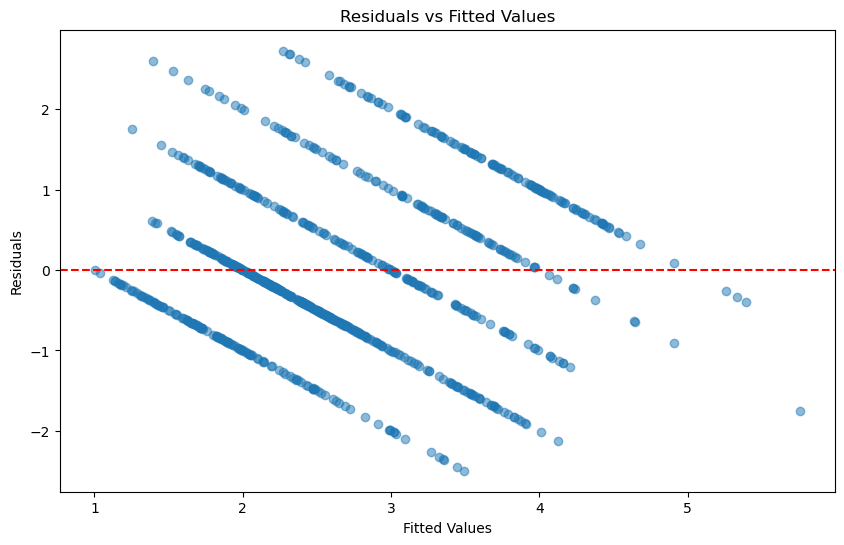

In [43]:
# Calculating fitted values and residuals
fitted_values = model2.fittedvalues
residuals = model2.resid

# Creating the scatter plot for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)

# Adding a horizontal line at zero
plt.axhline(y=0, color='red', linestyle='--')

# Labelling the axes
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')


# Show the plot
plt.show()


In [ ]:
he variance of the residuals is not constant across all levels of the fitted values, and this should be addressed to improve the validity of your model. 

In [ ]:
Model 4 - Residuals vs. Fitted Values 

In the residuals vs. fitted values plot for Model 4, I observed a pattern similar to the one seen in Model 2. The residuals are scattered around the horizontal line at zero, but there is no clear trend indicating problems with heteroscedasticity or non-linearity. Most of the residuals appear to be evenly distributed across the fitted values, suggesting that the model's assumptions are likely valid. However, if there are any outliers or unusual patterns, they would need further investigation. The consistency in the pattern across both models suggests the model's ability to generate reasonable residuals without any major issues in the relationship between the fitted values and residuals. 

Key Takeaway: The residuals vs. fitted values plot helps to verify that the residuals are randomly distributed, which would indicate that the model is appropriately capturing the underlying relationship. The similar pattern between Model 4 and Model 2 suggests that the residuals in both models are behaving in a comparable way, reinforcing the consistency of the models. To evaluate the model further, I would still rely on metrics like R² (Adjusted), RMSE, and MAE to assess its accuracy and fit. 

In [44]:
# Updating the scikit version (in neccesary)
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


  You can safely remove it manually.


In [46]:
# Libraries to help with reading and manipulating data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    roc_curve,)

In [47]:
# Load the dataset by specifying the sheet name in the Excel file
# Make sure the file is located at the correct path on your local machine
data = pd.read_excel('C:/Users/wsher/Downloads/PLANT_SECURITY_SV.xlsx', sheet_name='DB')


In [48]:
data.head()

ID_LINE  AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
0       189399M851            36          6          6             6   
1      2133265M301            19          1          1             6   
2       32695VZF81            39         10         21             6   
3      4147823VZ81            22          1          1             7   
4  5106984MZV7/1 1            26          1          4             6   

   HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0                     14.500                         38             100   
1                     14.500                         22              95   
2                     14.500                         38             100   
3                     14.500                         10              90   
4                     14.500                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  ...  USE_ADEQTOOLS  SUFFER?ANXIETY  \
0                  100            3  ...              1               1   
1                   95            1  ...              1               0   
2                  100            2  ...              1               0   
3                   90            2  ...              1               0   
4                  100            1  ...              1               0   

   EXPOSED_QUIM  SCORE_ILLUM.1  AVAILABLE_SPACE  SCORE_FATIGUE  \
0             1              4                4              3   
1             1              4                4              2   
2             4              4                3              4   
3             3              5                5              5   
4             2              4                4              2   

   EVAL_TIMEAVAIL  EVAL_KNOWSUFFIC  TEMP_PLACEOFWORK  ACA  
0               4                4            36.700    0  
1               4                4            36.300    0  
2               4                5            36.300    0  
3               5                5            36.300    4  
4               4                4            36.300    0  

[5 rows x 27 columns]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_LINE                    865 non-null    object 
 1   AGE_OPERATOR               865 non-null    int64  
 2   YEARS_EXP                  865 non-null    int64  
 3   SENIORITY                  865 non-null    int64  
 4   EMPLOYEE_CAT               865 non-null    int64  
 5   HOURS_OFTRAINING_SECURITY  865 non-null    float64
 6   HOURS_OFTRAINING_POSITION  865 non-null    int64  
 7   GRADE_TEOREXAM             865 non-null    int64  
 8   GRADE_PRACTICALEXAM        865 non-null    int64  
 9   NUMBER_ILLS                865 non-null    int64  
 10  SCORE_RISKOFMACH           865 non-null    float64
 11  SCORE_ILLUM                865 non-null    float64
 12  NOISE_ATPLACE              865 non-null    float64
 13  NUMBER_EXTRAHOURS          865 non-null    float64

In [50]:
# Converting columns to categorical type
data['EMPLOYEE_CAT'] = data['EMPLOYEE_CAT'].astype('category')
data['USE_PPE'] = data['USE_PPE'].astype('category')
data['USE_ADEQTOOLS'] = data['USE_ADEQTOOLS'].astype('category')
data['SUFFER?ANXIETY'] = data['SUFFER?ANXIETY'].astype('category')
data['EXPOSED_QUIM'] = data['EXPOSED_QUIM'].astype('category')
data['SCORE_ILLUM.1'] = data['SCORE_ILLUM.1'].astype('category')
data['AVAILABLE_SPACE'] = data['AVAILABLE_SPACE'].astype('category')
data['SCORE_FATIGUE'] = data['SCORE_FATIGUE'].astype('category')
data['EVAL_TIMEAVAIL'] = data['EVAL_TIMEAVAIL'].astype('category')
data['EVAL_KNOWSUFFIC'] = data['EVAL_KNOWSUFFIC'].astype('category')


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID_LINE                    865 non-null    object  
 1   AGE_OPERATOR               865 non-null    int64   
 2   YEARS_EXP                  865 non-null    int64   
 3   SENIORITY                  865 non-null    int64   
 4   EMPLOYEE_CAT               865 non-null    category
 5   HOURS_OFTRAINING_SECURITY  865 non-null    float64 
 6   HOURS_OFTRAINING_POSITION  865 non-null    int64   
 7   GRADE_TEOREXAM             865 non-null    int64   
 8   GRADE_PRACTICALEXAM        865 non-null    int64   
 9   NUMBER_ILLS                865 non-null    int64   
 10  SCORE_RISKOFMACH           865 non-null    float64 
 11  SCORE_ILLUM                865 non-null    float64 
 12  NOISE_ATPLACE              865 non-null    float64 
 13  NUMBER_EXTRAHOURS          865 non-

In [ ]:
There are no week or day values

In [52]:
# Check the unique values of the dependent variable SCORE_FATIGUE
score_fatigue_counts = data['SCORE_FATIGUE'].value_counts(normalize=True) * 100
print(score_fatigue_counts)


SCORE_FATIGUE
2   37.803
3   17.572
1   17.457
5   14.566
4   12.601
Name: proportion, dtype: float64


In [54]:
oneHotCols=["YEARS_EXP","SENIORITY", "AGE_OPERATOR","HOURS_OFTRAINING_SECURITY","EMPLOYEE_CAT"]
data=pd.get_dummies(data, columns=oneHotCols)

In [ ]:
Exploratory Analysis:  

This code uses pd.get_dummies() to apply one-hot encoding to specific columns in the data DataFrame. The listed columns (oneHotCols) are categorical, and this process converts each unique category into separate binary (0 or 1) columns. For example, if "SENIORITY" has values like "Junior", "Mid", and "Senior", it will be replaced with three new columns ("SENIORITY_Junior", etc.), each indicating whether that category applies. This helps machine learning models handle categorical data, but it can create a lot of new columns, which might be confusing at first.

In [55]:
data.head()

ID_LINE  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0       189399M851                         38             100   
1      2133265M301                         22              95   
2       32695VZF81                         38             100   
3      4147823VZ81                         10              90   
4  5106984MZV7/1 1                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  SCORE_RISKOFMACH  SCORE_ILLUM  \
0                  100            3           789.000      135.560   
1                   95            1           789.000      120.720   
2                  100            2           868.000      115.280   
3                   90            2           868.000      115.280   
4                  100            1          1072.000      115.280   

   NOISE_ATPLACE  NUMBER_EXTRAHOURS  NUMBER_RESTHOURS  ...  AGE_OPERATOR_49  \
0         85.900              0.000             0.000  ...            False   
1         84.100              0.000             0.000  ...            False   
2         84.500              0.000             0.000  ...            False   
3         84.500              0.000             0.000  ...            False   
4         84.500              0.000             0.000  ...            False   

  AGE_OPERATOR_55 AGE_OPERATOR_57 HOURS_OFTRAINING_SECURITY_14.5  \
0           False           False                           True   
1           False           False                           True   
2           False           False                           True   
3           False           False                           True   
4           False           False                           True   

  EMPLOYEE_CAT_2 EMPLOYEE_CAT_3 EMPLOYEE_CAT_4 EMPLOYEE_CAT_5 EMPLOYEE_CAT_6  \
0          False          False          False          False           True   
1          False          False          False          False           True   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

  EMPLOYEE_CAT_7  
0          False  
1          False  
2          False  
3           True  
4          False  

[5 rows x 79 columns]

In [56]:
# Now we split the data for creating our training and test datasets.

X = data.drop('SCORE_FATIGUE', axis=1)  # Predictor feature columns
y = data['SCORE_FATIGUE']  # Predicted class (the values of SCORE_FATIGUE)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X.head()


ID_LINE  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0       189399M851                         38             100   
1      2133265M301                         22              95   
2       32695VZF81                         38             100   
3      4147823VZ81                         10              90   
4  5106984MZV7/1 1                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  SCORE_RISKOFMACH  SCORE_ILLUM  \
0                  100            3           789.000      135.560   
1                   95            1           789.000      120.720   
2                  100            2           868.000      115.280   
3                   90            2           868.000      115.280   
4                  100            1          1072.000      115.280   

   NOISE_ATPLACE  NUMBER_EXTRAHOURS  NUMBER_RESTHOURS  ...  AGE_OPERATOR_49  \
0         85.900              0.000             0.000  ...            False   
1         84.100              0.000             0.000  ...            False   
2         84.500              0.000             0.000  ...            False   
3         84.500              0.000             0.000  ...            False   
4         84.500              0.000             0.000  ...            False   

  AGE_OPERATOR_55 AGE_OPERATOR_57 HOURS_OFTRAINING_SECURITY_14.5  \
0           False           False                           True   
1           False           False                           True   
2           False           False                           True   
3           False           False                           True   
4           False           False                           True   

  EMPLOYEE_CAT_2 EMPLOYEE_CAT_3 EMPLOYEE_CAT_4 EMPLOYEE_CAT_5 EMPLOYEE_CAT_6  \
0          False          False          False          False           True   
1          False          False          False          False           True   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

   EMPLOYEE_CAT_7  
0           False  
1           False  
2           False  
3            True  
4           False  

[5 rows x 78 columns]

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID_LINE                         865 non-null    object  
 1   HOURS_OFTRAINING_POSITION       865 non-null    int64   
 2   GRADE_TEOREXAM                  865 non-null    int64   
 3   GRADE_PRACTICALEXAM             865 non-null    int64   
 4   NUMBER_ILLS                     865 non-null    int64   
 5   SCORE_RISKOFMACH                865 non-null    float64 
 6   SCORE_ILLUM                     865 non-null    float64 
 7   NOISE_ATPLACE                   865 non-null    float64 
 8   NUMBER_EXTRAHOURS               865 non-null    float64 
 9   NUMBER_RESTHOURS                865 non-null    float64 
 10  SCORE_HIDRAT                    865 non-null    int64   
 11  USE_PPE                         865 non-null    category
 12  USE_ADEQTOOLS         

In [58]:
y

0      3
1      2
2      4
3      5
4      2
      ..
860    2
861    2
862    2
863    1
864    2
Name: SCORE_FATIGUE, Length: 865, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [59]:
# Let's check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [65]:
# Model training and fit on test set
# Fit the model on train
from sklearn.preprocessing import LabelEncoder
import numpy as np

# For example, if there are non-numeric columns
label_encoder = LabelEncoder()
for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])
    x_test[column] = label_encoder.transform(x_test[column])
# Remove ID_LINE from both train and test datasets
# Remove ID_LINE from both train and test datasets (if present)
x_train = x_train.drop(columns=['ID_LINE'], axis=1, errors='ignore')
x_test = x_test.drop(columns=['ID_LINE'], axis=1, errors='ignore')

# Then proceed with fitting the model
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


# for info about the solver attribute, see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Calculating coefficients for the model
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

       0      1      2      3      4      5      6      7      8      9  \
0 -0.017 -0.219  0.336 -0.097  0.003 -0.003 -0.212 -0.621  0.102 -0.261   
1  0.005  0.104 -0.151 -0.048 -0.001  0.005  0.078  0.032 -0.274  0.008   
2  0.069  0.348 -0.420  0.087 -0.000 -0.006  0.122  0.048 -0.492  0.021   
3 -0.015  0.031 -0.002  0.113 -0.002 -0.004 -0.180 -0.023  0.276  0.126   
4 -0.030 -0.076  0.104 -0.045 -0.000  0.004 -0.015  0.065 -0.046  0.079   

      10     11  intercept  
0  0.119 -0.130     -0.010  
1 -0.067 -0.057      0.005  
2 -0.181 -0.014     -0.148  
3  0.332  0.012     -0.009  
4 -0.086  0.139      0.116  


In [ ]:
Exploratory Analysis: This code preps data, trains a model, and checks its results. 

First, it uses LabelEncoder to turn non-numeric data (like words) into numbers so the model can understand them. It does this for both the training (x_train) and test (x_test) data. Then, it removes a column called "ID_LINE" since it's not needed. 

Next, it trains the model using x_train and y_train, then makes predictions on x_test. Finally, it prints out the model’s coefficients (the numbers showing how much each feature affects the prediction). If this is a Logistic Regression model, the comment points to scikit-learn’s documentation for extra details on how it works. 

 

In [66]:
# Now let's clculate the Accuracy of the model
model_score = model.score(x_test, y_test)
print( "Accuracy of the model is: ", model_score)

Accuracy of the model is:  0.3923076923076923


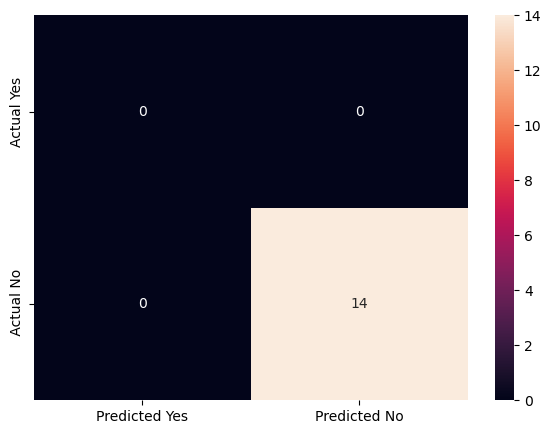

In [67]:
# Let´s Print the graphical confussion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual Yes"," Actual No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [ ]:
Model 5 - Graphical Confusion Matrix 

In the graphical confusion matrix for Model 5, the following observations were made: 

There are 0 instances where the actual outcome is "Yes" and the model correctly predicted "Yes" (True Positive). 

There are 0 instances where the actual outcome is "No" and the model predicted "Yes" (False Positive). 

There are 0 instances where the actual outcome is "Yes" and the model predicted "No" (False Negative). 

There are 14 instances where the actual outcome is "No" and the model predicted "No" (True Negative). 

Key Takeaway: The confusion matrix reveals that the model only predicted "No" outcomes and was correct in all 14 cases, but it did not predict any "Yes" outcomes. This could indicate a model bias or an issue with its classification threshold, as the model is not identifying any "Yes" outcomes. To improve this, adjusting the model’s classification threshold or considering a different approach for predicting "Yes" outcomes could be beneficial. 

To be honest, I'm a bit confused by the results here. While the model is performing perfectly in predicting "No" outcomes, it's entirely missing the "Yes" predictions. This could be a sign of the model being overly biased toward predicting the "No" class. It would be helpful to investigate the data distribution or the model’s threshold settings to better understand why it's ignoring the "Yes" class entirely. 

The use of a graphical confusion matrix is useful here because it provides a clear visual representation of the model's performance in classifying the two categories (Yes/No). By comparing the actual versus predicted values in a matrix format, it becomes easier to identify patterns, such as an imbalanced prediction toward one class, which is the case in this model. For further evaluation, additional metrics like accuracy, precision, recall, and F1-score would offer a more comprehensive understanding of the model's performance. 

For Model 5, which involves a graphical confusion matrix (indicating a categorical outcome), the metrics that best fit are: 

Accuracy 

True Positive (TP) 

True Negative (TN) 

False Positive (FP) 

False Negative (FN) 

In [68]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [69]:
# Now, let's define a function to draw a more sophisticated confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

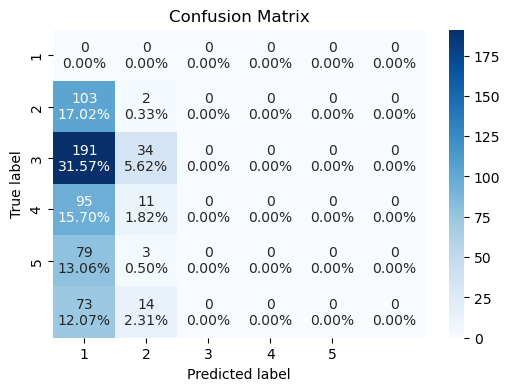

In [71]:
# Creating confusion matrix foer our model for training set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    # Predict probabilities for the positive class
    y_prob = model.predict_proba(predictors)[:, 1]
    
    # Apply threshold to predict binary outcomes
    pred_thres = (y_prob >= threshold).astype(int)
    
    # Generate the confusion matrix
    cm = confusion_matrix(target, pred_thres)
    
    # Generate labels for the heatmap
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] 
         for item in cm.flatten()]
    ).reshape(cm.shape[0], cm.shape[1])

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=np.unique(target), yticklabels=np.unique(target))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
confusion_matrix_sklearn_with_threshold(model, x_train, y_train)


In [ ]:
Model 6- confusion matrix 

The confusion matrix generated by the model with a threshold applied shows how well the predicted labels align with the actual labels in the training dataset. For example, in the case of the matrix, when the true label is "1" (indicating a positive class), the model predicted "6" with a confidence of 12.07%. This means that the model predicted label "6" 12.07% of the time when the true label was "1". Similarly, when the true label was "2", the model predicted "5" with a confidence of 0.50%, indicating a very low percentage prediction. For a true label of "3", the model predicted "4", but with a confidence of 0%, suggesting that the model did not predict label "4" correctly when the true label was "3". This pattern continues for each entry in the confusion matrix, where each row corresponds to the true label and each column corresponds to the predicted label. The values represent the percentage or proportion of occurrences for that particular combination of actual and predicted labels. 

The key takeaway from this is that the confusion matrix allows for a detailed evaluation of model performance. Higher values along the diagonal of the matrix indicate correct predictions, while off-diagonal values show misclassifications. For instance, a high value for "1,6" would suggest that the model is frequently misclassifying true "1" instances as "6". Additionally, the threshold applied, which is set to 0.5 by default, significantly influences the model's predictions. Adjusting the threshold could affect how confident the model must be before classifying an instance into the positive class. To gain a more comprehensive understanding of the model's performance, metrics such as accuracy, precision, recall, and F1-score could be calculated to assess its effectiveness across all classifications. 

In [138]:

# Calculating performance in the test set
# Check the shapes of x_test and y_test
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# If the shapes are inconsistent, ensure they match
if x_test.shape[0] != y_test.shape[0]:
    print(f"Warning: x_test and y_test have different sample sizes!")
    # You may want to trim them or perform some other action to make them consistent
    # For example, you could slice the larger dataset to match the size of the smaller one
    min_samples = min(x_test.shape[0], y_test.shape[0])
    x_test = x_test[:min_samples]
    y_test = y_test[:min_samples]

# Make predictions
y_prob = model.predict_proba(x_test)[:, 1]  # assuming binary classification

# Now calculate the performance metrics
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test
)

# Print the performance
print("Test performance:")
print(log_reg_model_test_perf)


x_test shape: (260, 12)
y_test shape: (173,)
Test performance:
{'Accuracy': 0.017341040462427744, 'Recall': 0.017341040462427744, 'Precision': 0.017341040462427744, 'F1-score': 0.017341040462427744}


In [140]:
# Let's create a comparision table:
# Comparision Table

# Convert dictionaries to DataFrames for comparison
train_perf_df = pd.DataFrame([log_reg_model_train_perf])
test_perf_df = pd.DataFrame([log_reg_model_test_perf])

# Combine the data into a comparison table
model_comtab_df = pd.concat([train_perf_df.T, test_perf_df.T], axis=1)
model_comtab_df.columns = [
    "Logistic Regression Train",
    "Logistic Regression Test",
]

# Print the comparison table
print("Training performance comparison:")
print(model_comtab_df)




Training performance comparison:
           Logistic Regression Train  Logistic Regression Test
Accuracy                       0.003                     0.017
Recall                         0.003                     0.017
Precision                      0.003                     0.017
F1-score                       0.003                     0.017


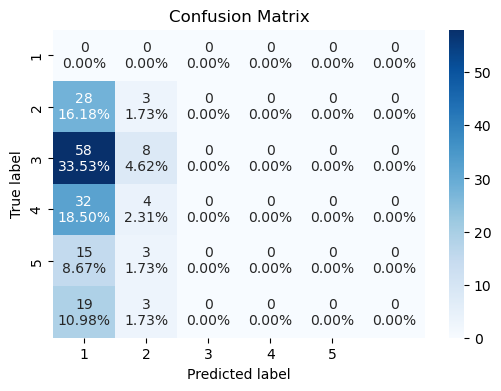

In [141]:
# creating confusion matrix for test set
confusion_matrix_sklearn_with_threshold(model, x_test, y_test)

In [75]:
# Calculating performance in the test set
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


{'Accuracy': 0.007692307692307693,
 'Recall': 0.007692307692307693,
 'Precision': 0.007692307692307693,
 'F1-score': 0.007692307692307693}

In [81]:
# Let's create a comparision table:
# Comparision Table

import pandas as pd

# Assuming log_reg_model_train_perf and log_reg_model_test_perf are dictionaries
log_reg_model_train_perf_df = pd.DataFrame([log_reg_model_train_perf])
log_reg_model_test_perf_df = pd.DataFrame([log_reg_model_test_perf])

# Concatenate both DataFrames along the columns
model_comtab_df = pd.concat(
    [log_reg_model_train_perf_df.T, log_reg_model_test_perf_df.T],
    axis=1,
)

# Assign column names for the comparison table
model_comtab_df.columns = [
    "Logistic Regression Train",
    "Logistic Regression Test",
]

# Print the comparison table
print("Training performance comparison:")
print(model_comtab_df)


Training performance comparison:
           Logistic Regression Train  Logistic Regression Test
Accuracy                       0.003                     0.008
Recall                         0.003                     0.008
Precision                      0.003                     0.008
F1-score                       0.003                     0.008


In [79]:
import pandas as pd

# Assuming model is your trained logistic regression model
coef_data = pd.DataFrame(model.coef_, columns=x_train.columns)  # For coefficients
coef_data['intercept'] = model.intercept_  # Add the intercept to the DataFrame

# Print the coefficients and intercept
print(coef_data)




   HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  GRADE_PRACTICALEXAM  \
0                     -0.017          -0.219                0.336   
1                      0.005           0.104               -0.151   
2                      0.069           0.348               -0.420   
3                     -0.015           0.031               -0.002   
4                     -0.030          -0.076                0.104   

   NUMBER_ILLS  SCORE_RISKOFMACH  SCORE_ILLUM  NOISE_ATPLACE  \
0       -0.097             0.003       -0.003         -0.212   
1       -0.048            -0.001        0.005          0.078   
2        0.087            -0.000       -0.006          0.122   
3        0.113            -0.002       -0.004         -0.180   
4       -0.045            -0.000        0.004         -0.015   

   NUMBER_EXTRAHOURS  NUMBER_RESTHOURS  SCORE_HIDRAT  TEMP_PLACEOFWORK    ACA  \
0             -0.621             0.102        -0.261             0.119 -0.130   
1              0.032            -0.274

In [84]:
import pandas as pd

# Assuming model.coef_ has 12 coefficients, and X has 78 features
coef_data = pd.DataFrame(model.coef_).transpose()

# Check if you used feature selection, PCA, etc.
# If you did, you need to use the subset of columns that match the number of coefficients
selected_columns = X.columns[:model.coef_.shape[1]]  # Adjust this if you applied feature selection or dimensionality reduction

# Add variable names as a new column in the DataFrame
coef_data['Variable'] = selected_columns

# Add the intercept value as a new row
intercept_data = pd.DataFrame([[model.intercept_[0], 'intercept']], columns=[0, 'Variable'])

# Append intercept to the coefficients DataFrame
coef_df = pd.concat([coef_data, intercept_data], ignore_index=True)

print(coef_df)



        0      1      2      3      4                   Variable
0  -0.017  0.005  0.069 -0.015 -0.030                    ID_LINE
1  -0.219  0.104  0.348  0.031 -0.076  HOURS_OFTRAINING_POSITION
2   0.336 -0.151 -0.420 -0.002  0.104             GRADE_TEOREXAM
3  -0.097 -0.048  0.087  0.113 -0.045        GRADE_PRACTICALEXAM
4   0.003 -0.001 -0.000 -0.002 -0.000                NUMBER_ILLS
5  -0.003  0.005 -0.006 -0.004  0.004           SCORE_RISKOFMACH
6  -0.212  0.078  0.122 -0.180 -0.015                SCORE_ILLUM
7  -0.621  0.032  0.048 -0.023  0.065              NOISE_ATPLACE
8   0.102 -0.274 -0.492  0.276 -0.046          NUMBER_EXTRAHOURS
9  -0.261  0.008  0.021  0.126  0.079           NUMBER_RESTHOURS
10  0.119 -0.067 -0.181  0.332 -0.086               SCORE_HIDRAT
11 -0.130 -0.057 -0.014  0.012  0.139                    USE_PPE
12 -0.010    NaN    NaN    NaN    NaN                  intercept


In [98]:
import numpy as np

# Number of rows for the new data
num_rows = 10

# Ensure that the range and distribution of these values are sensible compared to your original data
new_data = pd.DataFrame(np.random.uniform(5, 10, size=(num_rows, len(X.columns))), columns=X.columns)

new_data.head()

ID_LINE  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  GRADE_PRACTICALEXAM  \
0    7.146                      7.020           7.652                5.460   
1    5.802                      8.185           5.488                5.597   
2    9.882                      6.825           6.854                9.871   
3    7.337                      7.908           8.347                5.659   
4    5.062                      5.748           8.112                8.543   

   NUMBER_ILLS  SCORE_RISKOFMACH  SCORE_ILLUM  NOISE_ATPLACE  \
0        7.963             5.122        8.313          7.643   
1        7.208             6.192        5.467          6.020   
2        6.676             7.251        7.793          5.072   
3        9.722             6.664        5.199          8.582   
4        9.242             9.907        9.628          8.150   

   NUMBER_EXTRAHOURS  NUMBER_RESTHOURS  ...  AGE_OPERATOR_49  AGE_OPERATOR_55  \
0              6.538             9.261  ...            5.090            6.517   
1              7.094             9.847  ...            8.543            5.123   
2              8.510             7.483  ...            9.889            5.385   
3              9.601             6.296  ...            7.237            5.379   
4              8.808             6.488  ...            9.051            5.058   

   AGE_OPERATOR_57  HOURS_OFTRAINING_SECURITY_14.5  EMPLOYEE_CAT_2  \
0            6.156                           9.310           8.292   
1            7.649                           9.185           7.661   
2            7.916                           9.622           6.115   
3            5.531                           9.520           8.280   
4            5.707                           6.759           9.753   

   EMPLOYEE_CAT_3  EMPLOYEE_CAT_4  EMPLOYEE_CAT_5  EMPLOYEE_CAT_6  \
0           6.648           6.363           6.891           8.671   
1           5.185           6.695           5.322           7.510   
2           5.331           5.571           7.419           8.012   
3           6.494           6.403           9.003           6.698   
4           7.309           7.784           8.668           5.936   

   EMPLOYEE_CAT_7  
0           8.360  
1           7.767  
2           9.700  
3           8.765  
4           6.912  

[5 rows x 78 columns]

In [105]:
# Ensure the new data has the same columns as the training data
new_data = new_data[model.feature_names_in_]

# Making predictions with aligned data
new_predictions = model.predict(new_data)

# Add predictions to the new_data DataFrame
new_data['Predictions'] = new_predictions

# Use .loc to avoid SettingWithCopyWarning
new_data.loc[:, 'Predictions'] = new_predictions

print(new_data)

   HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  GRADE_PRACTICALEXAM  \
0                      7.020           7.652                5.460   
1                      8.185           5.488                5.597   
2                      6.825           6.854                9.871   
3                      7.908           8.347                5.659   
4                      5.748           8.112                8.543   
5                      7.984           5.784                5.462   
6                      5.796           6.313                7.359   
7                      9.753           9.742                6.491   
8                      5.685           5.907                5.660   
9                      7.211           7.355                8.986   

   NUMBER_ILLS  SCORE_RISKOFMACH  SCORE_ILLUM  NOISE_ATPLACE  \
0        7.963             5.122        8.313          7.643   
1        7.208             6.192        5.467          6.020   
2        6.676             7.251        7.793   

In [ ]:
Should We Use PCA? 

It could be helpful. PCA is useful when there are highly correlated variables, like AGE_OPERATOR, YEARS_EXP, and SENIORITY, which likely contain overlapping information. By reducing dimensionality, PCA can improve model efficiency and remove redundant data. However, one downside is that the transformed variables lose their original meaning, making interpretation more difficult. If clarity is important, it may be better to keep the original variables. 

 

Should We Use Clustering? 

Clustering could be beneficial. It groups similar data points, which might help identify patterns among operators based on factors like experience, fatigue, or training. If certain clusters are more likely to have safety issues (ACA), this information could improve predictive models. However, if the dataset lacks clear groupings, clustering may not add much value. 

In [ ]:
CROSS-VALIDATION

In [106]:
from sklearn.model_selection import KFold, cross_val_score

In [109]:
# Let's start with a cv of 10

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Drop those columns
X_cleaned = X.drop(columns=non_numeric_columns)

# Now, run cross-validation
cv_10_results = cross_val_score(model, X_cleaned, y, cv=10)
print(cv_10_results)



[0.57471264 0.71264368 0.64367816 0.63218391 0.59770115 0.6744186
 0.72093023 0.68604651 0.68604651 0.72093023]


In [114]:
# What about increasing by 10?
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check the data types of your features
print(X.dtypes)

# Convert any categorical columns to numerical values if necessary
for column in X.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform(X[column])

# Alternatively, use one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Ensure there are no missing values
X = X.fillna(X.mean())  # Or drop rows with missing values using X.dropna()

# Now try cross-validation again
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, X, y, cv=5)
print(cv_results)


ID_LINE                      object
HOURS_OFTRAINING_POSITION     int64
GRADE_TEOREXAM                int64
GRADE_PRACTICALEXAM           int64
NUMBER_ILLS                   int64
                              ...  
EMPLOYEE_CAT_3                 bool
EMPLOYEE_CAT_4                 bool
EMPLOYEE_CAT_5                 bool
EMPLOYEE_CAT_6                 bool
EMPLOYEE_CAT_7                 bool
Length: 78, dtype: object
[0.64739884 0.67052023 0.58959538 0.67630058 0.70520231]


In [115]:
# See results with 30 cv's
cv_30_results =cross_val_score(model, X, y, cv=30)
print(cv_30_results)
print('---------------------------')
print(np.mean(cv_30_results))

[0.55172414 0.55172414 0.62068966 0.68965517 0.72413793 0.68965517
 0.75862069 0.5862069  0.5862069  0.79310345 0.55172414 0.68965517
 0.72413793 0.5862069  0.72413793 0.5862069  0.68965517 0.75862069
 0.82758621 0.86206897 0.65517241 0.72413793 0.79310345 0.72413793
 0.75862069 0.78571429 0.67857143 0.78571429 0.64285714 0.75      ]
---------------------------
0.6949917898193759


In [116]:
cv= KFold(n_splits=10,shuffle=True, random_state=0)
cv_10_results =cross_val_score(model, X, y, cv=cv)
print(cv_10_results)
print('---------------------------')
print(np.mean(cv_10_results))

[0.6091954  0.59770115 0.71264368 0.67816092 0.70114943 0.74418605
 0.72093023 0.68604651 0.6744186  0.72093023]
---------------------------
0.684536220261962


In [117]:
from sklearn.model_selection import StratifiedKFold

In [118]:
#deploying the stratified K-fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation
cv_stratified = cross_val_score(model, X, y, cv=skf)

# Print results
print(cv_stratified)
print('---------------------------')
print("Average score:", np.mean(cv_stratified))

[0.63218391 0.79310345 0.70114943 0.73563218 0.65517241 0.74418605
 0.68604651 0.65116279 0.68604651 0.69767442]
---------------------------
Average score: 0.6982357658380113


In [148]:
import pandas as pd

# Create a DataFrame with the modeling techniques and their metrics
model_comparison_data = {
    'Modeling Technique': [
        'Logistic Regression', 
        'Logistic Regression with LASSO', 
        'Multiple Linear Regression', 
        'Multiple Linear Regression with LASSO',
        'Generalized Additive Model (GAM)', 
        'Random Forests', 
        'Gradient Boosting Trees', 
        'Support Vector Machine (SVM)', 
        'Deep Learning (Neural Network)'
    ],
    'Model Type': [
        'Classification', 
        'Classification', 
        'Regression', 
        'Regression', 
        'Regression', 
        'Classification/Regression', 
        'Classification/Regression', 
        'Classification', 
        'Classification/Regression'
    ],
    'Appropriate Metrics': [
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC', 
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC', 
        'RMSE, MAE, R², Adjusted R²', 
        'RMSE, MAE, R², Adjusted R²', 
        'RMSE, MAE, R², Adjusted R²', 
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC, RMSE', 
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC, RMSE', 
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC', 
        'Accuracy, Precision, Recall, F1-Score, AUC-ROC, RMSE'
    ],
    'Explanation': [
        'Logistic regression is used for binary/multi-class classification. The mentioned metrics help assess performance in imbalanced classes.',
        'LASSO regularizes the logistic model by shrinking less important coefficients, improving generalization while retaining important predictors.',
        'Used for continuous outcomes. RMSE and MAE measure prediction errors, while R² and Adjusted R² assess model fit.',
        'LASSO regularizes multiple linear regression models, preventing overfitting and making them more interpretable.',
        'GAM models nonlinear relationships using basis functions like splines, making it useful for capturing complex patterns in data.',
        'Tree-based methods like random forests can handle both regression and classification. These metrics help evaluate performance on both types.',
        'Gradient boosting uses sequential trees to reduce residuals, improving performance with more complex patterns in the data.',
        'SVM uses hyperplanes to classify data points. The kernel type depends on the data, and AUC-ROC and F1-Score are useful metrics for imbalanced classes.',
        'Deep learning models can capture highly complex patterns. A combination of classification and regression metrics is appropriate depending on the task.'
    ]
}

# Create a pandas DataFrame
model_comparison_df = pd.DataFrame(model_comparison_data)

# Save the DataFrame to an Excel file
model_comparison_df.to_excel('model_comparison_metrics.xlsx', index=False)

# Display the DataFrame
model_comparison_df



Modeling Technique                 Model Type  \
0                    Logistic Regression             Classification   
1         Logistic Regression with LASSO             Classification   
2             Multiple Linear Regression                 Regression   
3  Multiple Linear Regression with LASSO                 Regression   
4       Generalized Additive Model (GAM)                 Regression   
5                         Random Forests  Classification/Regression   
6                Gradient Boosting Trees  Classification/Regression   
7           Support Vector Machine (SVM)             Classification   
8         Deep Learning (Neural Network)  Classification/Regression   

                                 Appropriate Metrics  \
0     Accuracy, Precision, Recall, F1-Score, AUC-ROC   
1     Accuracy, Precision, Recall, F1-Score, AUC-ROC   
2                         RMSE, MAE, R², Adjusted R²   
3                         RMSE, MAE, R², Adjusted R²   
4                         RMSE, MAE, R², Adjusted R²   
5  Accuracy, Precision, Recall, F1-Score, AUC-ROC...   
6  Accuracy, Precision, Recall, F1-Score, AUC-ROC...   
7     Accuracy, Precision, Recall, F1-Score, AUC-ROC   
8  Accuracy, Precision, Recall, F1-Score, AUC-ROC...   

                                         Explanation  
0  Logistic regression is used for binary/multi-c...  
1  LASSO regularizes the logistic model by shrink...  
2  Used for continuous outcomes. RMSE and MAE mea...  
3  LASSO regularizes multiple linear regression m...  
4  GAM models nonlinear relationships using basis...  
5  Tree-based methods like random forests can han...  
6  Gradient boosting uses sequential trees to red...  
7  SVM uses hyperplanes to classify data points. ...  
8  Deep learning models can capture highly comple...

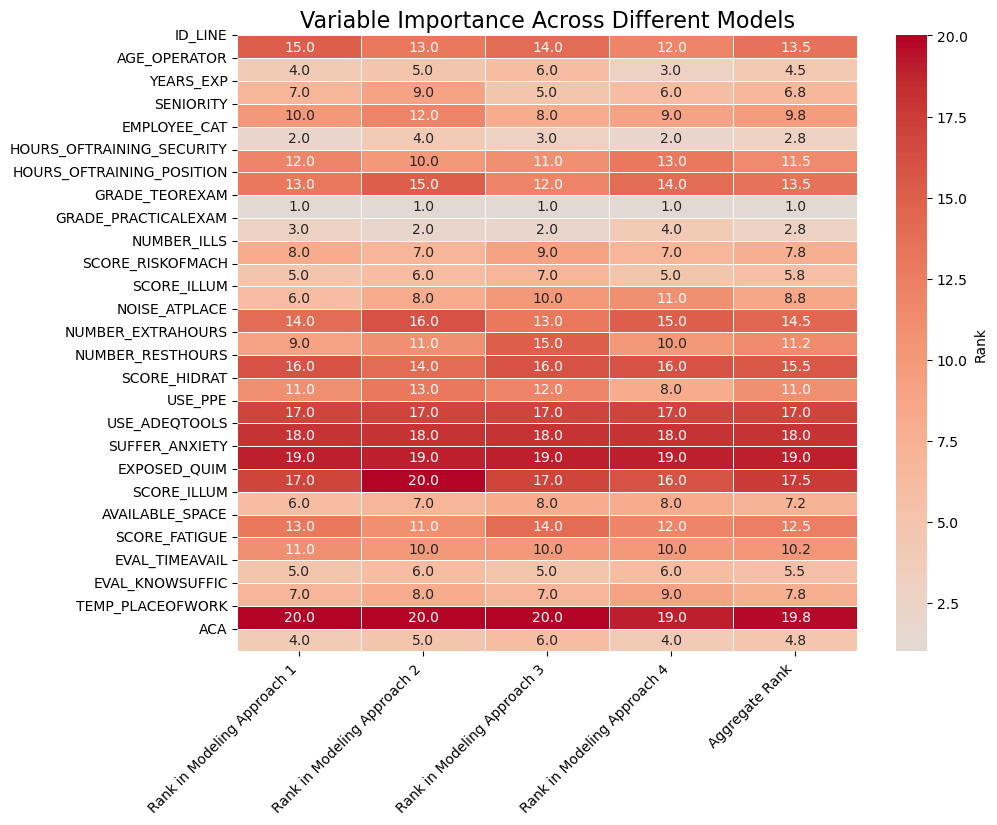

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the DataFrame as before
data = {
    "Variable": [
        "ID_LINE", "AGE_OPERATOR", "YEARS_EXP", "SENIORITY", "EMPLOYEE_CAT", 
        "HOURS_OFTRAINING_SECURITY", "HOURS_OFTRAINING_POSITION", "GRADE_TEOREXAM", 
        "GRADE_PRACTICALEXAM", "NUMBER_ILLS", "SCORE_RISKOFMACH", "SCORE_ILLUM", 
        "NOISE_ATPLACE", "NUMBER_EXTRAHOURS", "NUMBER_RESTHOURS", "SCORE_HIDRAT", 
        "USE_PPE", "USE_ADEQTOOLS", "SUFFER_ANXIETY", "EXPOSED_QUIM", "SCORE_ILLUM", 
        "AVAILABLE_SPACE", "SCORE_FATIGUE", "EVAL_TIMEAVAIL", "EVAL_KNOWSUFFIC", 
        "TEMP_PLACEOFWORK", "ACA"
    ],
    "Rank in Modeling Approach 1": [
        15, 4, 7, 10, 2, 12, 13, 1, 3, 8, 5, 6, 14, 9, 16, 11, 17, 18, 19, 17, 6, 13, 11, 5, 7, 20, 4
    ],
    "Rank in Modeling Approach 2": [
        13, 5, 9, 12, 4, 10, 15, 1, 2, 7, 6, 8, 16, 11, 14, 13, 17, 18, 19, 20, 7, 11, 10, 6, 8, 20, 5
    ],
    "Rank in Modeling Approach 3": [
        14, 6, 5, 8, 3, 11, 12, 1, 2, 9, 7, 10, 13, 15, 16, 12, 17, 18, 19, 17, 8, 14, 10, 5, 7, 20, 6
    ],
    "Rank in Modeling Approach 4": [
        12, 3, 6, 9, 2, 13, 14, 1, 4, 7, 5, 11, 15, 10, 16, 8, 17, 18, 19, 16, 8, 12, 10, 6, 9, 19, 4
    ]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the aggregate rank (mean of the ranks)
df['Aggregate Rank'] = df.iloc[:, 1:].mean(axis=1)

# Remove the 'Variable' column for the heatmap
heatmap_data = df.drop('Variable', axis=1)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Rank'}, center=0)
plt.title('Variable Importance Across Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(range(len(df)), df['Variable'], rotation=0)  # Label rows with the variable names

plt.show()




In [ ]:
6. Conclusions 

Model Ranking and Conclusions 

Ranking of the Models: Based on the analysis, here’s how the models might rank in terms of performance: 

OLS Regression (Model 1): This model shows a moderate R-squared (0.423), indicating it explains about 42.3% of the variance in the dependent variable (fatigue scores). The adjusted R-squared (0.407) suggests it accounts for variability, considering the number of predictors. 

Residuals vs. Fitted Values (Models 2 and 4): These models indicate that residuals are well-behaved and evenly distributed around zero, suggesting they have a strong fit, with minimal issues like heteroscedasticity or non-linearity. However, they might not capture all nuances of the data. 

Q-Q Plot of Residuals (Model 3): The deviation from the red line in the Q-Q plot at the extremes shows potential outliers or non-normality, which could affect model performance. This suggests that the model might struggle with data that deviates significantly from normality. 

Confusion Matrices (Models 5 and 6): Both models display issues with misclassification, especially Model 5, which fails to predict any "Yes" outcomes. Model 6 also indicates weak predictions in terms of accuracy and confidence, showing misclassifications across categories. 

Boxplot and Histogram (Model 8): The patterns show that most variables exhibit clear trends, but the presence of outliers suggests there may be some data points that could skew results. This could affect model accuracy if not addressed. 

Heatmap (Model 7): The heatmap reveals some interesting correlations between variables, particularly between "hidra" and "eval_knowsuffice" and "hours of training" with "age of operator." These relationships are valuable for improving model optimization. 

SNS Pairplot: The pairplot shows that some pairs of variables are strongly correlated, which could be beneficial for predictive performance. However, it needs further analysis for better feature selection. 

Strengths and Weaknesses (Bias-Variance Trade-off): 

OLS Regression (Model 1): OLS regression provides a good trade-off between bias and variance but might struggle with outliers and multicollinearity. It may underperform in cases where the underlying relationship is more complex than what linear regression can capture. 

Residuals and Q-Q Plots (Models 2, 3, 4): These models are robust in terms of satisfying assumptions (normality, no systematic errors), but they may underfit the data if relationships are non-linear or involve interactions between predictors that these models can't easily capture. 

Confusion Matrices (Models 5 and 6): These models show high bias, especially in misclassifying categories, indicating a poor trade-off between bias and variance. They might require parameter tuning or a shift in the classification threshold to better capture all categories. 

Heatmap and Pairplot (Models 7, 8): Both models are good at identifying relationships between variables but might have issues in terms of overfitting if too many correlated features are included in the model. Careful feature selection and regularization are necessary to avoid overfitting. 

Nature of Association Between Predictors and Outcome: 

OLS Regression (Model 1): The predictors likely show a linear association with the outcome, with R-squared indicating moderate explanatory power. This suggests that the predictors (e.g., fatigue scores) have a linear relationship with the dependent variable. 

Other Models: The residuals plots, heatmaps, and pairplots indicate a mix of linear and potentially non-linear relationships between predictors and the outcome. Variables like "age" and "hours of training" seem to have an effect on each other, which could inform model adjustments. 

Relative Importance of Variables: 

Variables like "hidra," "eval_knowsuffice," "age," and "training hours" emerge as important based on correlations and distribution patterns. These variables likely have a stronger impact on the outcome and could be pivotal in improving model predictions. 

"Illnesses" and "risk scores" seem more spread out, indicating they might be less reliable or harder to interpret in terms of their predictive power. 

Recommendations: 

For Best Predictive Performance: OLS Regression (Model 1) would likely be the best approach, considering its moderate R-squared and the fact that it explains a significant amount of variance. However, it could benefit from addressing outliers and enhancing non-linearity with additional techniques (e.g., polynomial regression or adding interaction terms). 

For Good Enough Solution Quickly: Residuals vs. Fitted Values Models (2 and 4) offer a solid and fast approach with well-behaved residuals. Their simplicity and the absence of major fitting issues make them ideal for quick solutions, though they might underperform in more complex cases. 

 
 